# REPERTOIRE

In [1]:
# C:\Users\dieud\Documents\OPENCLASSROOMS\FORMATION_DATA_SCIENTIST\PROJETS_DS_OCR\PROJET7\OCR_Projet7
# PROJET5_DATA_SCIENTIST_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//dieud//Documents//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//PROJET7//OCR_Projet7')

# IMPORTATION DES LIBRAIRIES USITEES 

In [2]:
# General
# File system management
import os
import glob
import sys
import gc
import re

# Visualisation
import time
from contextlib import contextmanager
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import isnan
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.impute import SimpleImputer

import math
import scipy
import scipy.stats as stats
from scipy.stats import variation

import collections
from collections import Counter
from sys import path


from termcolor import colored

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA



%matplotlib inline


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print("Setup complete.")


pd.set_option('display.max_columns', 300)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_colwidth', 200)

Setup complete.


In [3]:
# Versions
print('Version des librairies utilisées :')


#print('Matplotlib            : ' + mpl.__version__)
print('Missingno             : ' + msno.__version__)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Python                : ' + sys.version)
print('Seaborn               : ' + sns.__version__)
#print('Shap                  : ' + shap.__version__)
#print('Sklearn               : ' + sklearn.__version__ )

Version des librairies utilisées :
Missingno             : 0.5.2
NumPy                 : 1.24.3
Pandas                : 1.5.3
Python                : 3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]
Seaborn               : 0.12.2


# I - IMPORTATION DES DONNEES 

In [4]:
# chargement des données

application_train             = pd.read_csv('DATA/application_train.csv', sep=',')
application_test              = pd.read_csv('DATA/application_test.csv', sep=',')
bureau                        = pd.read_csv('DATA/bureau.csv', sep=',')
bureau_balance                = pd.read_csv('DATA/bureau_balance.csv', sep=',')
previous_application          = pd.read_csv('DATA/previous_application.csv', sep=',')
installments_payments         = pd.read_csv('DATA/installments_payments.csv', sep=',')
credit_card_balance           = pd.read_csv('DATA/credit_card_balance.csv', sep=',')
POS_CASH_balance              = pd.read_csv('DATA/POS_CASH_balance.csv', sep=',')
sample_submission             = pd.read_csv('DATA/sample_submission.csv', sep=',')

In [5]:
#Liste des fichiers.
PATH = "DATA/"
print(os.listdir(PATH))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


## I-1 Description des fichiers
Il y a un total de 9 fichiers : 1 fichier principal pour l'entraînement (avec la cible) 1 fichier principal pour le test (sans la cible), 1 fichier de description, et 6 autres fichiers contenant des informations supplémentaires sur chaque prêt.

**application_{train|test}.csv**
les principales données de formation et de test contenant des informations sur chaque demande de prêt chez Home Credit. Chaque prêt a sa propre ligne et est identifié par la caractéristique SK_ID_CURR. Les données de demande d'entraînement sont accompagnées de la caractéristique TARGET indiquant 0 : le prêt a été remboursé ou 1 : le prêt n'a pas été remboursé.

**bureau.csv**
données concernant les crédits antérieurs du client auprès d'autres institutions financières. Chaque crédit précédent a sa propre ligne dans bureau, mais un prêt dans les données de la demande peut avoir plusieurs crédits précédents.

**bureau_balance.csv**
données mensuelles concernant les crédits précédents dans le bureau. Chaque ligne correspond à un mois de crédit antérieur, et un crédit antérieur unique peut avoir plusieurs lignes, une pour chaque mois de la durée du crédit.

**POS_CASH_balance.csv**
données mensuelles sur les prêts au point de vente ou au comptant que les clients ont eu avec Home Credit. Chaque ligne correspond à un mois d'un prêt au point de vente ou d'un prêt en espèces précédent, et un seul prêt précédent peut avoir plusieurs lignes.

**credit_card_balance.csv**
données mensuelles sur les cartes de crédit que les clients ont eu avec Home Credit. Chaque ligne correspond à un mois de solde de carte de crédit, et une seule carte de crédit peut avoir plusieurs lignes.

**previous_application.csv**
demandes précédentes de prêts au Home Credit des clients qui ont des prêts dans les données de demande. Chaque prêt actuel dans les données de la demande peut avoir plusieurs prêts précédents. Chaque demande précédente a une ligne et est identifiée par la caractéristique SK_ID_PREV.

**installments_payments.csv**
historique des paiements pour les prêts précédents chez Home Credit. Il y a une ligne pour chaque paiement effectué et une ligne pour chaque paiement manqué.

**sample_submission.csv**
Echantillon de soumission contenant: La demande de prêt caractérisée par SK_ID_CURR et l'objectif caractérisé par Target, de longueur égale aux données test.

**HomeCredit_columns_description.csv**
Ce fichier contient les descriptions des colonnes des différents fichiers de données.

## I-2 Relations entre les différents fichiers

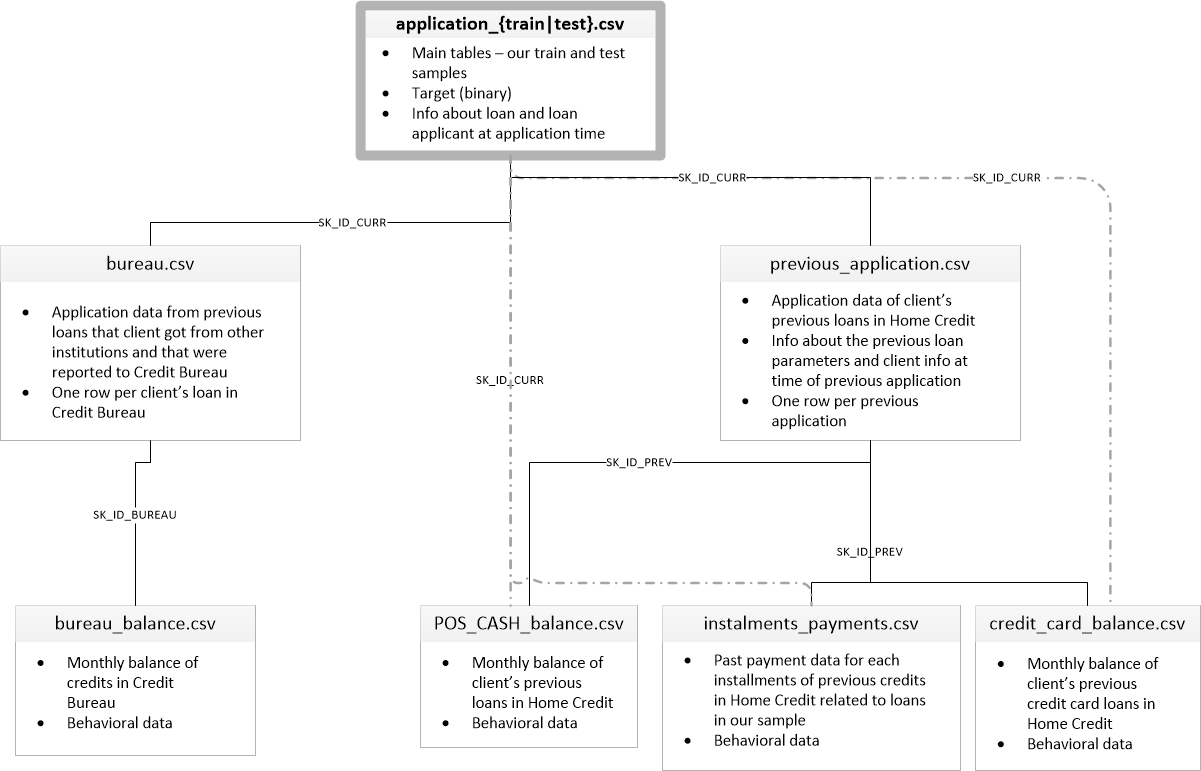

In [6]:
# Description des colonnes des fichiers.l'encodage 'mac_roman' assure une lecture correcte des caractères 

description = pd.read_csv('DATA/HomeCredit_columns_description.csv',encoding='mac_roman',index_col=0)
description

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [7]:
# Fonction qui retourne des information sur le dataset.

def data_describe(folder):
    '''Vérifiez le nombre de lignes, de colonnes, de valeurs manquantes et de doublons.
        Compter le type de colonnes.
        Indicateur de mémoire'''

    # Création d'un dictionnaire pour stocker les informations des fichiers
    data_dict = {}

    # Parcours des fichiers dans le dossier spécifié
    for file in folder:
        # Lecture du fichier avec l'encodage 'mac_roman'
        data = pd.read_csv(file, encoding='mac_roman')

        # Calcul des différentes métriques pour le fichier
        data_dict[file] = [data.shape[0],  # Nombre de lignes
                           data.shape[1],  # Nombre de colonnes
                           round(data.isna().sum().sum() / data.size * 100, 2),  # Pourcentage de valeurs manquantes
                           round(data.duplicated().sum().sum() / data.size * 100, 2),  # Pourcentage de valeurs dupliquées
                           data.select_dtypes(include=['object']).shape[1],  # Nombre de colonnes de type object
                           data.select_dtypes(include=['float']).shape[1],  # Nombre de colonnes de type float
                           data.select_dtypes(include=['int']).shape[1],  # Nombre de colonnes de type int
                           data.select_dtypes(include=['bool']).shape[1],  # Nombre de colonnes de type bool
                           round(data.memory_usage().sum() / 1024 ** 2, 3)]  # Utilisation mémoire en MB

    # Création d'un DataFrame à partir du dictionnaire de données
    comparative_table = pd.DataFrame.from_dict(data=data_dict,
                                               columns=['Rows', 'Columns', '%NaN', '%Duplicate',
                                                        'object_dtype', 'float_dtype', 'int_dtype',
                                                        'bool_dtype', 'MB_Memory'],
                                               orient='index')

    # Affichage d'un message résumant les fichiers analysés
    print("Description des datasets :")
    return comparative_table

# II Analyse Exploratoire Globale

In [8]:
# data description de tout les fichiers CSV.

data_describe(glob.glob("DATA/*.csv"))

Description des datasets :


,Rows,Columns,%NaN,%Duplicate,object_dtype,float_dtype,int_dtype,bool_dtype,MB_Memory
DATA\application_test.csv,48744,121,23.81,0.0,16,65,40,0,44.998
DATA\application_train.csv,307511,122,24.40,0.0,16,65,41,0,286.227
DATA\bureau.csv,1716428,17,13.50,0.0,3,8,6,0,222.620
DATA\bureau_balance.csv,27299925,3,0.00,0.0,1,0,2,0,624.846
DATA\credit_card_balance.csv,3840312,23,6.65,0.0,1,15,7,0,673.883
DATA\HomeCredit_columns_description.csv,219,5,12.15,0.0,4,0,1,0,0.008
DATA\installments_payments.csv,13605401,8,0.01,0.0,0,5,3,0,830.408
DATA\POS_CASH_balance.csv,10001358,8,0.07,0.0,1,2,5,0,610.435
DATA\previous_application.csv,1670214,37,17.98,0.0,16,15,6,0,471.481
DATA\sample_submission.csv,48744,2,0.00,0.0,0,1,1,0,0.744


In [9]:
# fonnction qui sépare les données numériques et objects
def var_features(folder):
    '''Données comparatives avec valeurs manquantes,
       et de nombreuses statistiques descriptives.'''
    
    # Dictionnaire pour stocker les caractéristiques de type 'object' des fichiers
    data_object = {}
    # Dictionnaire pour stocker les caractéristiques numériques des fichiers
    data_numeric = {}
    
    # Parcours des fichiers dans le dossier spécifié
    for file in folder:
        # Lecture du fichier avec l'encodage 'mac_roman'
        data = pd.read_csv(file, encoding='mac_roman')
        
        # Analyse des caractéristiques de type 'object'
        data_object[file] = [(x, data[x].dtype, 
                              data[x].isna().sum().sum(),
                              int(data[x].count())) for x in data.select_dtypes(exclude=['int', 'float'])]
        
        # Analyse des caractéristiques numériques
        data_numeric[file] = [(x, data[x].dtype, 
                               int(data[x].isna().sum().sum()), 
                               int(data[x].count()), 
                               int(data[x].mean()), 
                               round(data[x].std(),1),
                               round(data[x].min(),1), 
                               round(data[x].max(),1)) for x in data.select_dtypes(exclude='object')]
        

    # Création d'un DataFrame à partir du dictionnaire de caractéristiques 'object'
    comparative_object = pd.DataFrame.from_dict(data=data_object, orient='index')
    dict_of_object = {name: pd.DataFrame(file) for name,file in data_object.items()}
    df1 = pd.concat(dict_of_object, axis=0)
    df1.columns=['features','dtype','nan','count']
    
    # Création d'un DataFrame à partir du dictionnaire de caractéristiques numériques
    comparative_numeric = pd.DataFrame.from_dict(data=data_numeric, orient='index')
    dict_of_numeric = {name: pd.DataFrame(file) for name,file in data_numeric.items()}
    df2 = pd.concat(dict_of_numeric, axis=0)
    df2.columns=['features','dtype','nan','count', 'mean', 'std', 'min','max']
        
    return df1, df2

In [10]:
# description des variables catégorielles

var_features(folder=glob.glob('DATA/*.csv'))[0]

features  \
DATA\application_test.csv               0            NAME_CONTRACT_TYPE   
                                        1                   CODE_GENDER   
                                        2                  FLAG_OWN_CAR   
                                        3               FLAG_OWN_REALTY   
                                        4               NAME_TYPE_SUITE   
                                        5              NAME_INCOME_TYPE   
                                        6           NAME_EDUCATION_TYPE   
                                        7            NAME_FAMILY_STATUS   
                                        8             NAME_HOUSING_TYPE   
                                        9               OCCUPATION_TYPE   
                                        10   WEEKDAY_APPR_PROCESS_START   
                                        11            ORGANIZATION_TYPE   
                                        12           FONDKAPREMONT_MODE   
                                        13               HOUSETYPE_MODE   
                                        14           WALLSMATERIAL_MODE   
                                        15          EMERGENCYSTATE_MODE   
DATA\application_train.csv              0            NAME_CONTRACT_TYPE   
                                        1                   CODE_GENDER   
                                        2                  FLAG_OWN_CAR   
                                        3               FLAG_OWN_REALTY   
                                        4               NAME_TYPE_SUITE   
                                        5              NAME_INCOME_TYPE   
                                        6           NAME_EDUCATION_TYPE   
                                        7            NAME_FAMILY_STATUS   
                                        8             NAME_HOUSING_TYPE   
                                        9               OCCUPATION_TYPE   
                                        10   WEEKDAY_APPR_PROCESS_START   
                                        11            ORGANIZATION_TYPE   
                                        12           FONDKAPREMONT_MODE   
                                        13               HOUSETYPE_MODE   
                                        14           WALLSMATERIAL_MODE   
                                        15          EMERGENCYSTATE_MODE   
DATA\bureau.csv                         0                 CREDIT_ACTIVE   
                                        1               CREDIT_CURRENCY   
                                        2                   CREDIT_TYPE   
DATA\bureau_balance.csv                 0                        STATUS   
DATA\credit_card_balance.csv            0          NAME_CONTRACT_STATUS   
DATA\HomeCredit_columns_description.csv 0                         Table   
                                        1                           Row   
                                        2                   Description   
                                        3                       Special   
DATA\POS_CASH_balance.csv               0          NAME_CONTRACT_STATUS   
DATA\previous_application.csv           0            NAME_CONTRACT_TYPE   
                                        1    WEEKDAY_APPR_PROCESS_START   
                                        2   FLAG_LAST_APPL_PER_CONTRACT   
                                        3        NAME_CASH_LOAN_PURPOSE   
                                        4          NAME_CONTRACT_STATUS   
                                        5             NAME_PAYMENT_TYPE   
                                        6            CODE_REJECT_REASON   
                                        7               NAME_TYPE_SUITE   
                                        8              NAME_CLIENT_TYPE   
                                        9           NAME_GOODS_CATEGORY   
                                        10               NAME_PORTFOLIO   
             

In [11]:
# description des variables numériques 

var_features(folder=glob.glob('DATA/*.csv'))[1]

features  \
DATA\application_test.csv               0                      SK_ID_CURR   
                                        1                    CNT_CHILDREN   
                                        2                AMT_INCOME_TOTAL   
                                        3                      AMT_CREDIT   
                                        4                     AMT_ANNUITY   
                                        5                 AMT_GOODS_PRICE   
                                        6      REGION_POPULATION_RELATIVE   
                                        7                      DAYS_BIRTH   
                                        8                   DAYS_EMPLOYED   
                                        9               DAYS_REGISTRATION   
                                        10                DAYS_ID_PUBLISH   
                                        11                    OWN_CAR_AGE   
                                        12                     FLAG_MOBIL   
                                        13                 FLAG_EMP_PHONE   
                                        14                FLAG_WORK_PHONE   
                                        15               FLAG_CONT_MOBILE   
                                        16                     FLAG_PHONE   
                                        17                     FLAG_EMAIL   
                                        18                CNT_FAM_MEMBERS   
                                        19           REGION_RATING_CLIENT   
                                        20    REGION_RATING_CLIENT_W_CITY   
                                        21        HOUR_APPR_PROCESS_START   
                                        22     REG_REGION_NOT_LIVE_REGION   
                                        23     REG_REGION_NOT_WORK_REGION   
                                        24    LIVE_REGION_NOT_WORK_REGION   
                                        25         REG_CITY_NOT_LIVE_CITY   
                                        26         REG_CITY_NOT_WORK_CITY   
                                        27        LIVE_CITY_NOT_WORK_CITY   
                                        28                   EXT_SOURCE_1   
                                        29                   EXT_SOURCE_2   
                                        30                   EXT_SOURCE_3   
                                        31                 APARTMENTS_AVG   
                                        32               BASEMENTAREA_AVG   
                                        33    YEARS_BEGINEXPLUATATION_AVG   
                                        34                YEARS_BUILD_AVG   
                                        35                 COMMONAREA_AVG   
                                        36                  ELEVATORS_AVG   
                                        37                  ENTRANCES_AVG   
                                        38                  FLOORSMAX_AVG   
                                        39                  FLOORSMIN_AVG   
                                        40                   LANDAREA_AVG   
                                        41           LIVINGAPARTMENTS_AVG   
                                        42                 LIVINGAREA_AVG   
                                        43        NONLIVINGAPARTMENTS_AVG   
                                        44              NONLIVINGAREA_AVG   
                                        45                APARTMENTS_MODE   
                                        46              BASEMENTAREA_MODE   
                                        47   YEARS_BEGINEXPLUATATION_MODE   
                                        48               YEARS_BUILD_MODE   
                                        49                COMMONAREA_MODE   
                                        50                 ELEVATORS_MODE   
                                        51                 EN

# III Analyse Exploratoire des Datasets Train & Test. 

Nous analyserons respectivement:

1. Fonction pour clé primaire.

2. Forme des datasets & Nature des variables.

3. Diffrérences entre les datasets train & test.

4. Statistiques descriptives.

5. Analyse des valeurs manquantes. 

6. Visualisation des données.

## III-1. Fonction Pour Clé Primaire.

In [12]:
# Définition de la clé primaire.

def find_primary_key(dataframe):
    """
    Cette fonction trouve la clé primaire d'un DataFrame en vérifiant si une colonne unique existe.
    Si une colonne unique est trouvée, elle est renvoyée comme clé primaire. Sinon, None est renvoyé.
    """
    for column in dataframe.columns:
        if dataframe[column].is_unique:
            return column
    return None

find_primary_key(application_train)

'SK_ID_CURR'

## III-2 Formes des Datasets & Nature des Variables.

In [13]:
# III-2-1 Formes des Datasests.

print('Forme du dataset train : ', application_train.shape)
print('Forme du dataset test : ',  application_test.shape)

Forme du dataset train :  (307511, 122)
Forme du dataset test :  (48744, 121)


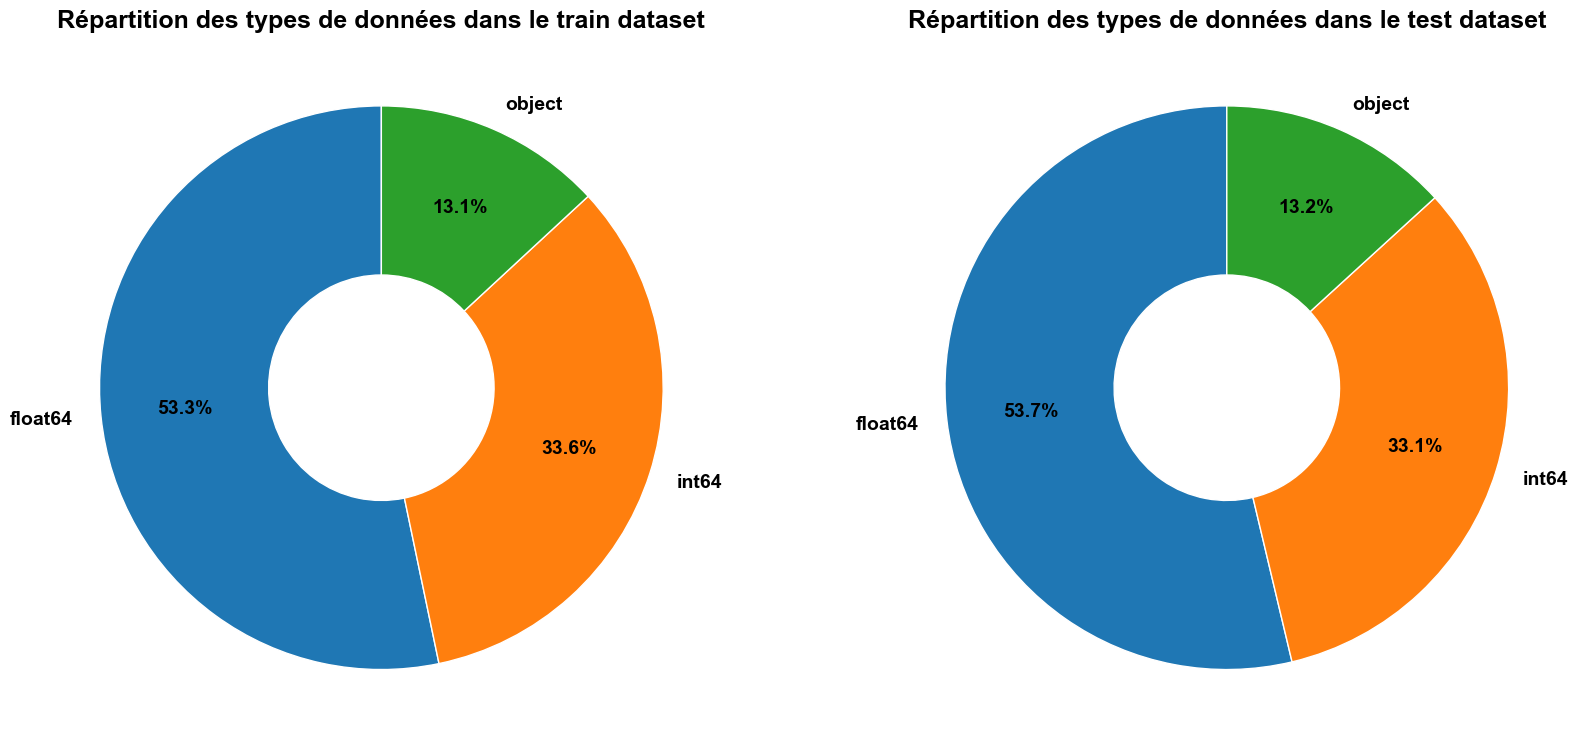

In [14]:
# Nature des variables.

# Définition du titre
title = {"family": "Arial",
         "color":  "black",
         "weight": "bold",
         "size": 18}

# Configuration du style Seaborn
sns.set_style("whitegrid")

# Définition des couleurs pour chaque type de données
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Création d'une figure avec deux sous-figures
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

# Premier sous-plot : train dataset
application_train.dtypes.value_counts().plot(kind="pie",
                                 autopct="%1.1f%%",
                                 colors=colors,
                                 wedgeprops=dict(width=0.6, edgecolor='w'),
                                 textprops=dict(color='black', size=14, weight='bold'),
                                 startangle=90,
                                 pctdistance=0.7,
                                 labeldistance=1.1,
                                 ax=ax1)
ax1.set_title("Répartition des types de données dans le train dataset", fontdict=title)
ax1.legend().remove()

# Second sous-plot : test dataset
application_test.dtypes.value_counts().plot(kind="pie",
                                 autopct="%1.1f%%",
                                 colors=colors,
                                 wedgeprops=dict(width=0.6, edgecolor='w'),
                                 textprops=dict(color='black', size=14, weight='bold'),
                                 startangle=90,
                                 pctdistance=0.7,
                                 labeldistance=1.1,
                                 ax=ax2)
ax2.set_title("Répartition des types de données dans le test dataset", fontdict=title)
ax2.legend().remove()

# Affichage de la figure
plt.show()

In [15]:
# III-2-2 Analyse des données dupliquées.

list_names = ['application_train', 'application_test']
datasets = [application_train, application_test]

# La boucle parcourt chaque nom de dataset dans la liste list_names
for name in list_names:
    # La méthode index() renvoie la position de l'élément dans la liste list_names.
    # On utilise cette position pour accéder au DataFrame correspondant dans la liste datasets.
    pos = list_names.index(name)
    dataset = datasets[pos]
    
    # La ligne suivante affiche le nombre de lignes en double dans le DataFrame dataset
    # en utilisant la méthode duplicated() avec comme argument la colonne 'SK_ID_CURR'.
    # La méthode sum() compte le nombre de lignes en double dans le DataFrame.
    print(f"Dupliqué du jeu de données {name}." )
    print(dataset.duplicated('SK_ID_CURR').sum())
    print("\n")

Dupliqué du jeu de données application_train.
0


Dupliqué du jeu de données application_test.
0




Il n'y a pas de doublon dans les jeux de données app_train et app_test.

## III-3 Différence dataset Train & dataset Test.

In [16]:
# Récupérer les noms des colonnes dans chaque dataset.

application_train_columns = set(application_train.columns)

application_test_columns = set(application_test.columns)

# Trouver la colonne manquante.
missing_column = list(application_train_columns - application_test_columns)

# Afficher la colonne manquante
print("La colonne manquante est : ", missing_column[0])

La colonne manquante est :  TARGET


Notre colonne manquante dans le dataset test est TARGET. Cela signifie que le dataset test sera utilisée pour la phase de prédiction dans la finalisation de notre projet.
Toutefois, les traitements (nettoyage) que nous allons effectuer au dataset train sera également effectuée pour le test.

## III-4 Statistiques Descriptives.

Les datasets Train et Test se différenciant par la seule variable Target, nous nous focaliserons sur le dataset Train. Puis nous déduirons des corrections éventuelles dans les deux datasets.

In [17]:
# Analyse du dataset app_train.

application_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,NaN,NaN,NaN,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,307511.0,NaN,NaN,NaN,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,NaN,NaN,NaN,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,NaN,NaN,NaN,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,NaN,NaN,NaN,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5


Il apparaît de notre première analyse du dataset Train:

- La présence de nombreuses valeurs manquantes. 
- Notre clé primaire ne présente aucune valeur manquante et ne semble pas présenter de doublons (à vérifier plus tard). 
- Pas de valeur manquante ni doublon pour notre TARGET.

- Quelques valeurs fortement en décalage avec la moyenne et le max ('OWN_CAR_AGE', 'DAYS_BIRTH' et 'DAYS_EMPLOYED')  impliquant la présomption de valeurs aberrantes-atypiques à vérifier.

A présent, nous allons procéder à l'analyse des valeurs manquantes.

## III-5 Analyse des Données Manquantes.

In [18]:
def pie_NaN(dataframe, size):
    """Cette fonction permet de faire un camembert montrant le
     proportion de données manquantes sur l'ensemble de données.
     dataframe : dataset
     taille : taille de la figure (X,X)"""

    # Calculer le nombre de lignes et de colonnes dans le DataFrame.
    lines = dataframe.shape[0]
    columns = dataframe.shape[1]
    
    # Calculer le nombre total de données non manquantes dans le DataFrame.
    nb_data = dataframe.count().sum()
    
    # Calculer le nombre total de données attendues dans le DataFrame s'il n'y avait pas de valeurs manquantes.
    nb_totale = (columns * lines)
    
    # Calculer le taux de données non manquantes dans le DataFrame.
    rate_dataOK = (nb_data / nb_totale)
    
    # Afficher le taux de remplissage du jeu de données (taux de données non manquantes) et le taux de données manquantes.
    print(f"Le jeu de données est rempli à {rate_dataOK :.2%}")
    print(f"et il a {1 - rate_dataOK :.2%} de données manquantes")
    print("\n \n ")
    
    # Préparer les données pour le diagramme circulaire.
    rates = [rate_dataOK, 1 - rate_dataOK]
    labels = ["Données", "NAN"]
    explode = (0, 0.1)  # Pour faire ressortir la part des données manquantes.
    colors = ['gold', 'pink']
    
    # Créer le diagramme circulaire en utilisant matplotlib et afficher le pourcentage de chaque part.
    plt.figure(figsize=size)
    plt.pie(rates, explode=explode, labels=labels, colors=colors,
            autopct='%.2f%%', shadow=True, textprops={'fontsize': 26})
    
    # Définir le titre du diagramme circulaire.
    ttl = plt.title("Taux de remplissage du jeu de données", fontsize=32)
    ttl.set_position([0.5, 0.85])
    
    plt.axis('equal')  # Assurer que le diagramme circulaire est bien un cercle.
    plt.tight_layout()  # Ajuster la disposition pour éviter les coupures de texte.
    plt.show()  # Afficher le diagramme circulaire.

Le jeu de données est rempli à 75.60%
et il a 24.40% de données manquantes

 
 


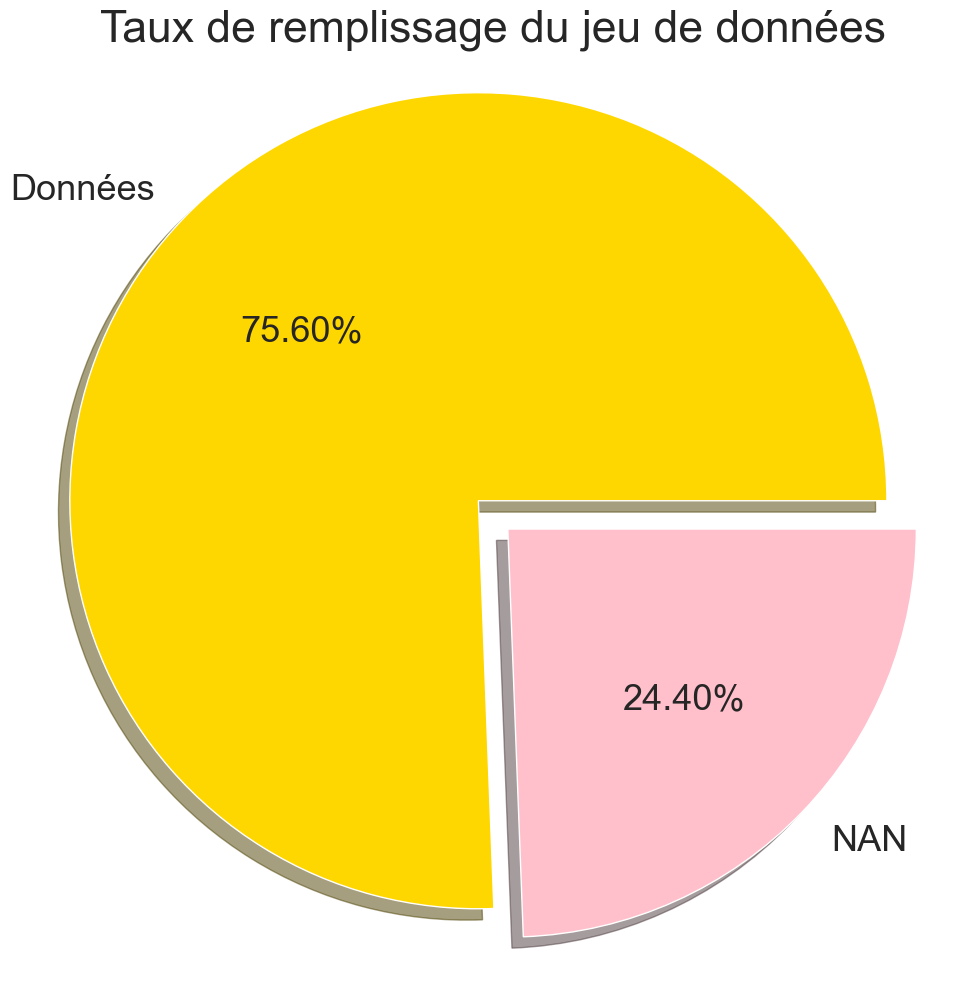

In [19]:
# afficher la proportion de données manquantes pour le dataset app_train
pie_NaN(application_train, (10,10))

Le dataset Train a plus de 24% de données manquantes. Voyons dans quelles colonnes précisément.

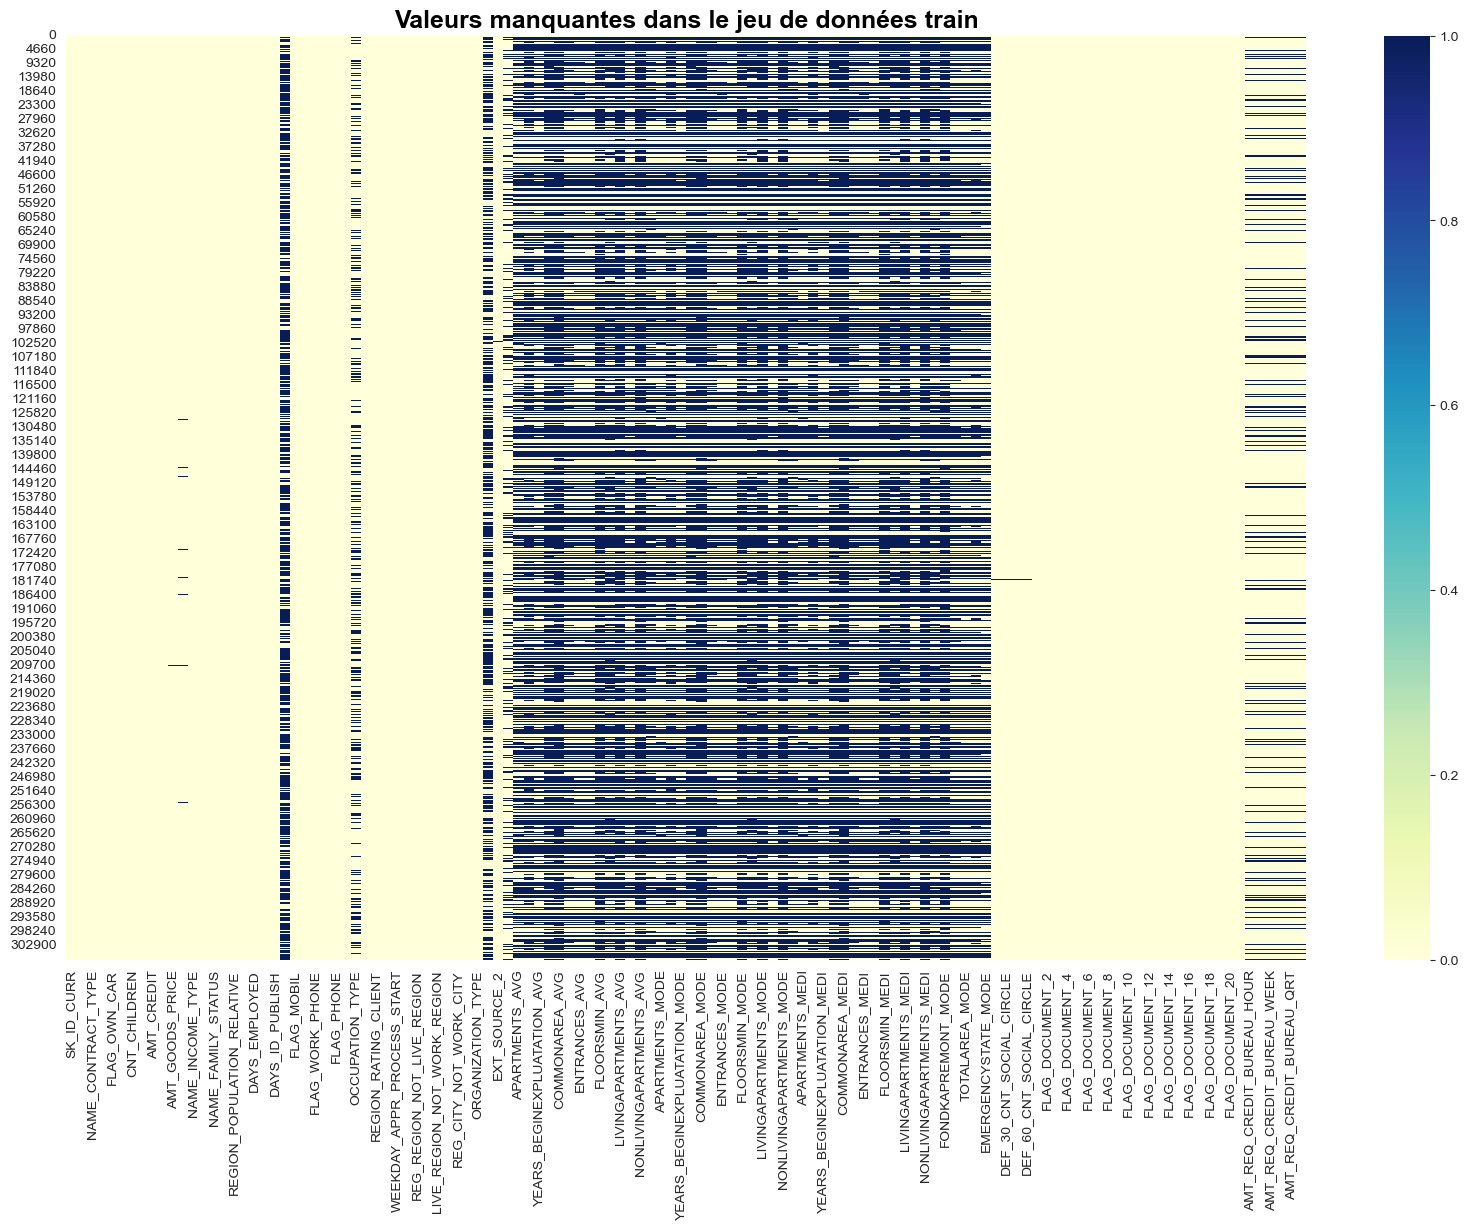

In [20]:
# Heatmap de Visualisation des Valeurs Manquantes du Train Dataset.

plt.figure(figsize=(20,12))
sns.heatmap(application_train.isnull(), cmap="YlGnBu")

# Affichage du titre
plt.title("Valeurs manquantes dans le jeu de données train", fontdict = title)

# Affichage du graphique
plt.show()

Les données manquantes sont plus fortement présentent sur les caractéristiques des habitats (et non sur les crédits).

In [21]:
# Fonction qui calcule les valeurs manquantes par colonnes. 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Le jeu de données contient " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes présentant des valeurs manquantes.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Statistiques des Valeurs Manquantes du dataset Train.
missing_values = missing_values_table(application_train)
missing_values.head(20)

Le jeu de données contient 122 colonnes.
Il y a 67 colonnes présentant des valeurs manquantes.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## III-6 Visualisation des Données. 

Nous analyserons & visualiserons trois types de données:

* La Variable Target.

* les Variables Catégorielles.

* les Variables Numériques.

### III-6-1 Analyse & Visualisation de la Variable Target.

La TARGET est l'objectif à prédire : soit 
 *  0 : Le prêt a été remboursé à temps, 
 *  1 : Le client a eu des difficultés de paiement.

In [22]:
# Analyse de la variable Target.

application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

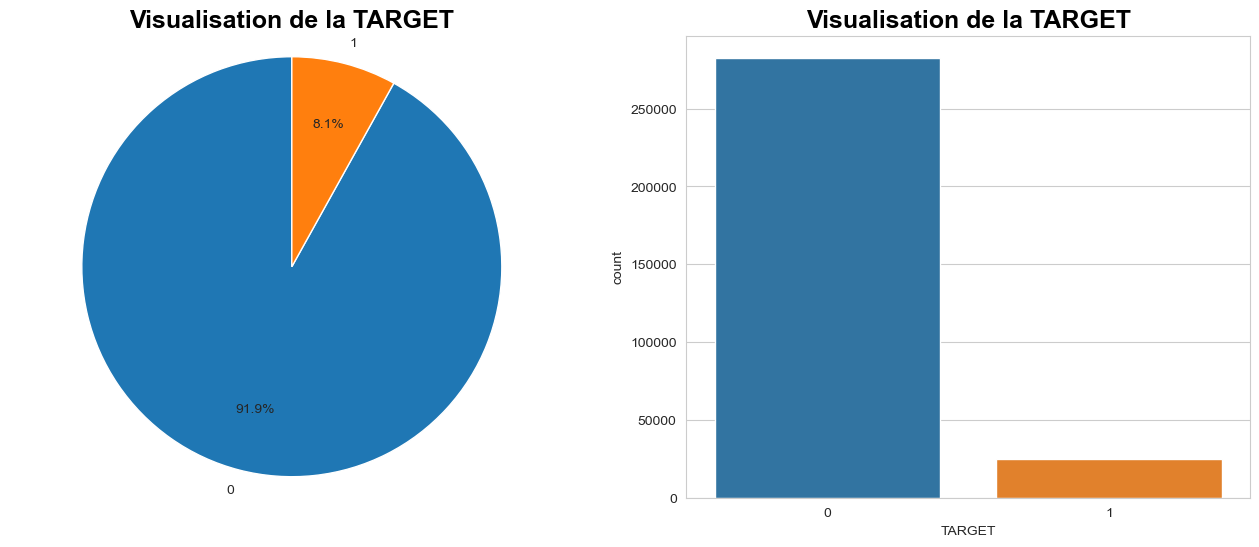

In [23]:
# Visualisation de la Variable Target: Création d'une grille de 1 ligne et 2 colonnes pour les deux graphiques.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

# Graphique 1 : représentation en pourcentage
labels = application_train['TARGET'].value_counts().index.tolist()
values = application_train['TARGET'].value_counts().values.tolist()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7)
ax1.set_title("Visualisation de la TARGET", fontdict=title)
ax1.axis('equal')

# Graphique 2 : représentation en nombre
sns.countplot(x='TARGET', data=application_train, ax=ax2)
ax2.set_title("Visualisation de la TARGET", fontdict=title)

# Affichage des graphiques
plt.show()

Nous constatons un très fort déséquilibre entre deux classes de la variable Target du dataset Train:
* Target = 0: Il y a beaucoup plus de prêts remboursés à temps.
* Target =  : Il existe très peu de prêts non remboursés.

Cette situationaura un impact très important sur notre analyse de données. Il est indispensable de traiter cette problématique lors de notre modélisation.

In [24]:
# Rappel des types de variables.

application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### III-6-2 Analyse & Visualisation des Variables Catégorielles.

In [25]:
# Sélection des colonnes catégorielles

obj_vars      = application_train.select_dtypes(include=['object']).columns
application_train_obj = application_train[obj_vars]
# Visualisation.
application_train_obj.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [26]:
# Valeurs uniques des variables Catégorielles.

application_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [27]:
# NaN sur les variables catégorielles.
application_train.select_dtypes('object').isna().sum(axis=0)

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [28]:
# Définition de la fonction plot_stat

def plot_stat(data, feature, title, size) : 
    
    ax, fig = plt.subplots(figsize=(12,4)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title, fontsize=20, fontweight='bold')

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
    
    # Afficher le graphique
    plt.show()

In [29]:
# Définition de la fonction Pourcentage avec prêts non remboursés.

def plot_percent_target1(data, feature, title, size) : 
    
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    ax, fig = plt.subplots(figsize=(12,4)) 
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("Pourcentage avec prêt non remboursé (target = 1)")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
    
    # Afficher le graphique
    plt.show()

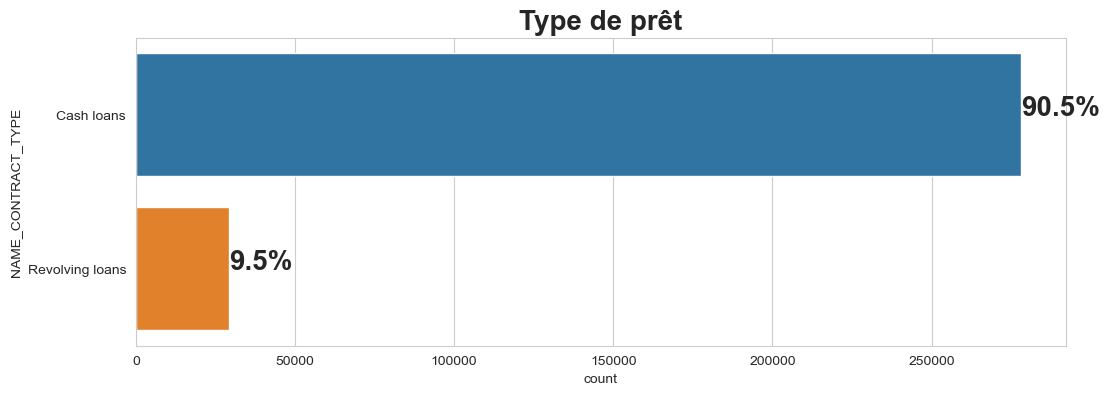

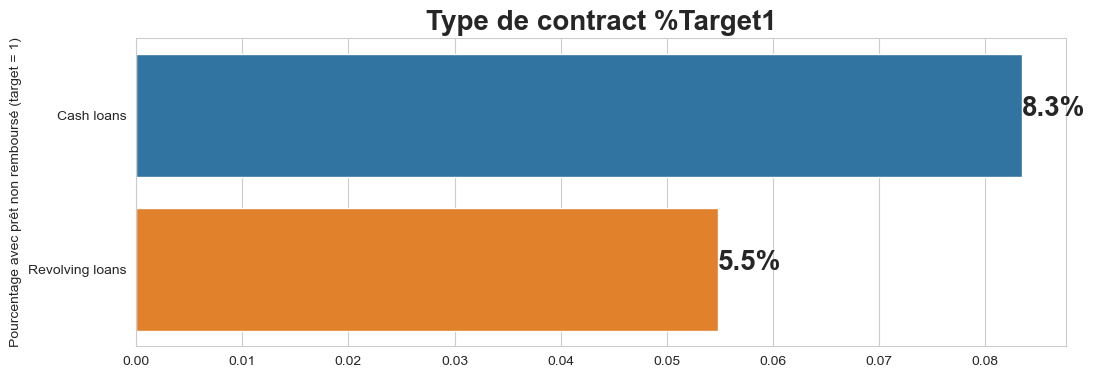

In [30]:
# Distribution du type de prêts contractés & comparaison avec le pourcentage des prêts non remboursés (Target=1).

plot_stat(application_train, 'NAME_CONTRACT_TYPE',"Type de prêt", (15,10))
plot_percent_target1(application_train, 'NAME_CONTRACT_TYPE',"Type de contract %Target1", (15,10))

Les crédits revolving ne représentent que 10% du total de prêts.
Un plus grand nombre de crédits revolving, par rapport à leur fréquence, ne sont pas remboursés.

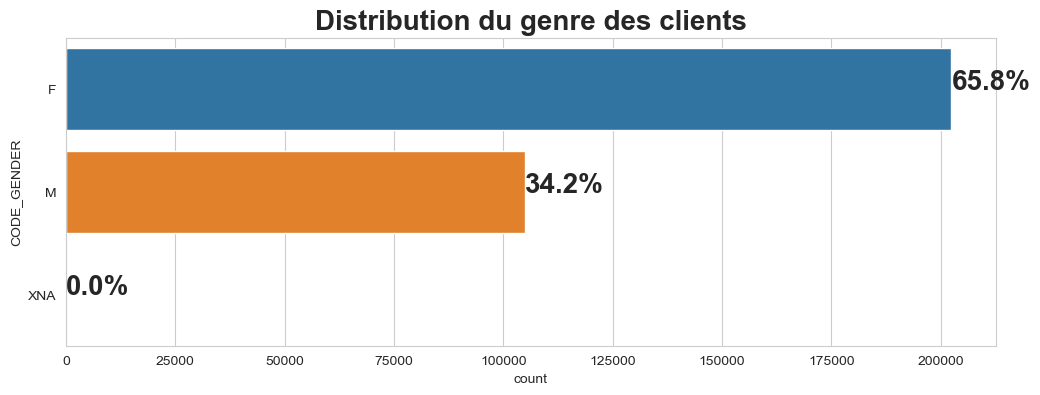

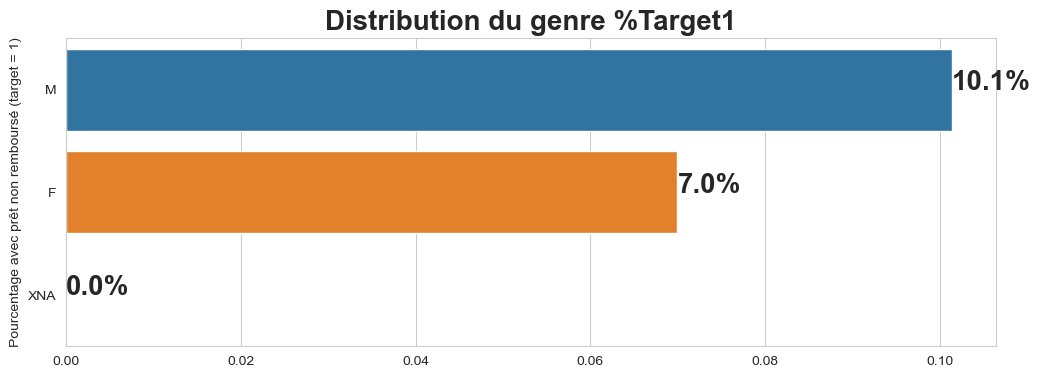

In [31]:
# Distribution de prêt par genre & pourcentage des prêts non rembourqéq par sexe du client.
plot_stat(application_train, 'CODE_GENDER',"Distribution du genre des clients", (15,10))
plot_percent_target1(application_train, 'CODE_GENDER',"Distribution du genre %Target1", (15,10))

Le nombre de femmes ayant reçu le prêt est environ le double des hommes. Plus des hommes(10%) ne remboursent  leurs prêts par rapport aux femmes 7%0 

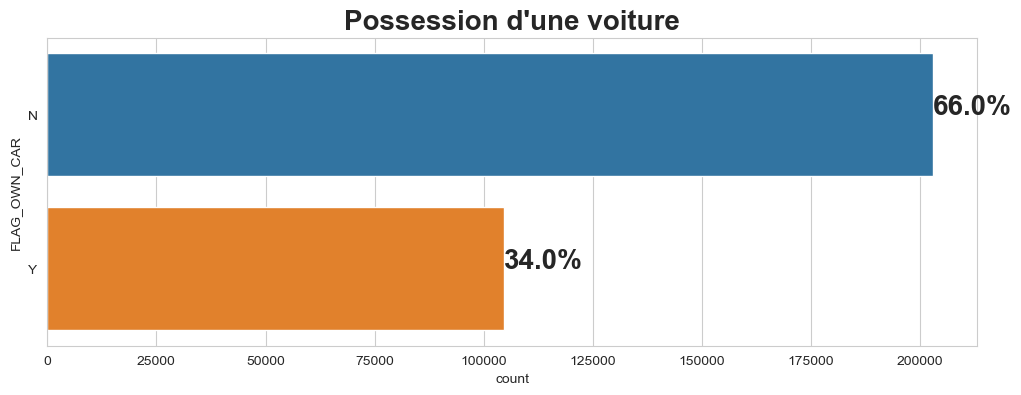

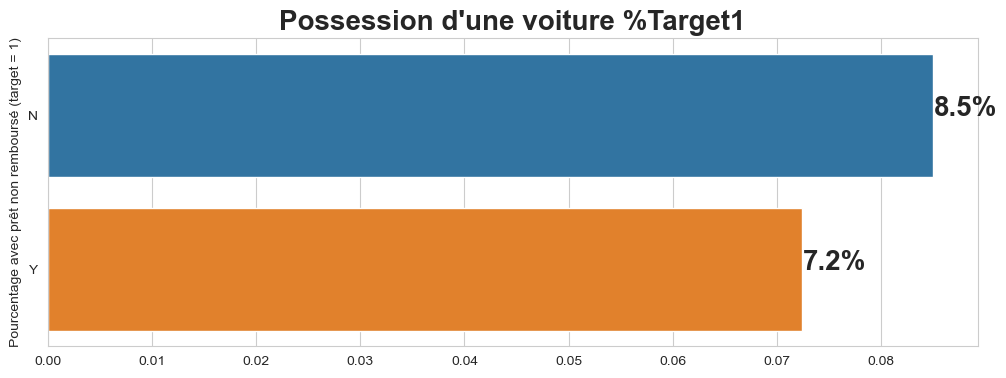

In [32]:
# Distribution d'un impact possible entre les clients propriétaire d'un véhicule et ceux qui ne le sont pas.
plot_stat(application_train, 'FLAG_OWN_CAR',"Possession d'une voiture", (15,10))
plot_percent_target1(application_train, 'FLAG_OWN_CAR',"Possession d'une voiture %Target1", (15,10))

Les propriétaires & non propriétaires d'une voiture ont des taux de non-remboursement assez proche: environ 8%.

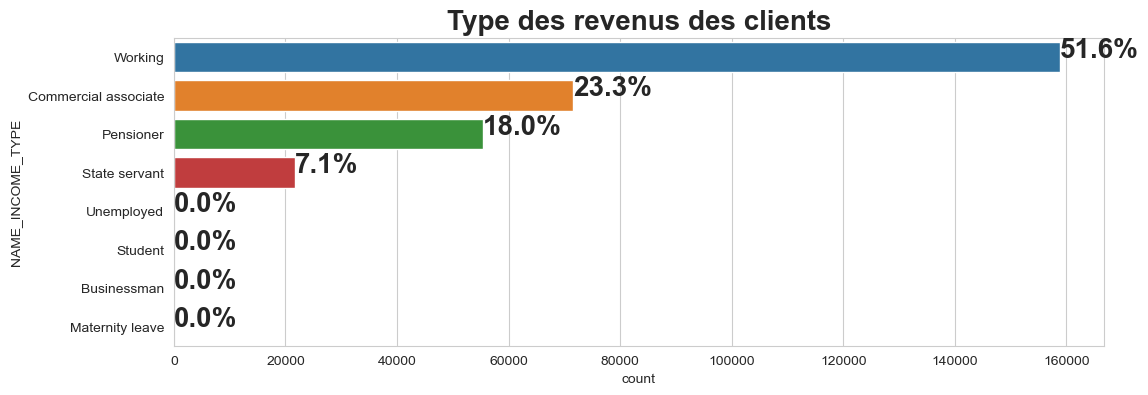

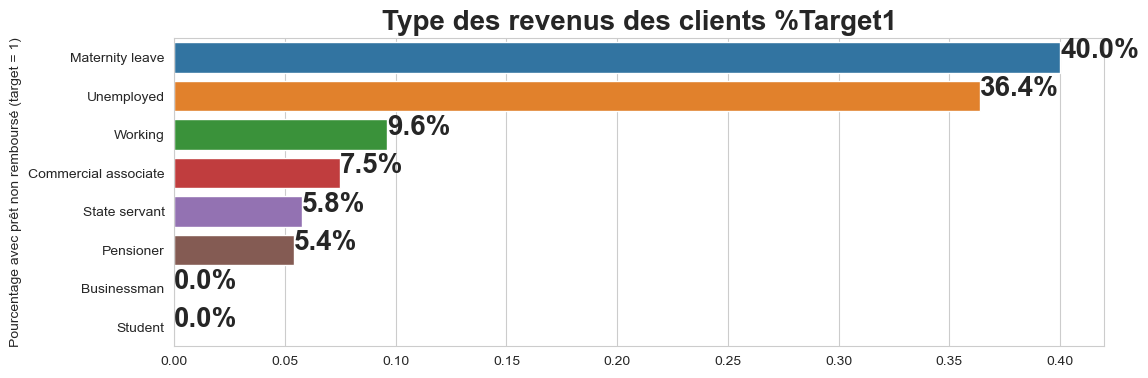

In [33]:
# Type des revenus des clients
plot_stat(application_train, 'NAME_INCOME_TYPE',"Type des revenus des clients", (15,10))
plot_percent_target1(application_train, 'NAME_INCOME_TYPE',"Type des revenus des clients %Target1", (15,10))

Les personnes contractant des prêts sont prioritairement: Travailleurs, Associés commerciaux, les retraités et les fonctionnaires.
Ceux qui ne remboursent pas les prêts sont prioritairement: Les demandeurs avec le type de revenu Congé de maternité 40%, les chômeurs (37%). Les autres types de revenus sont inférieurs à 10% pour ne pas rembourser leurs prêts.


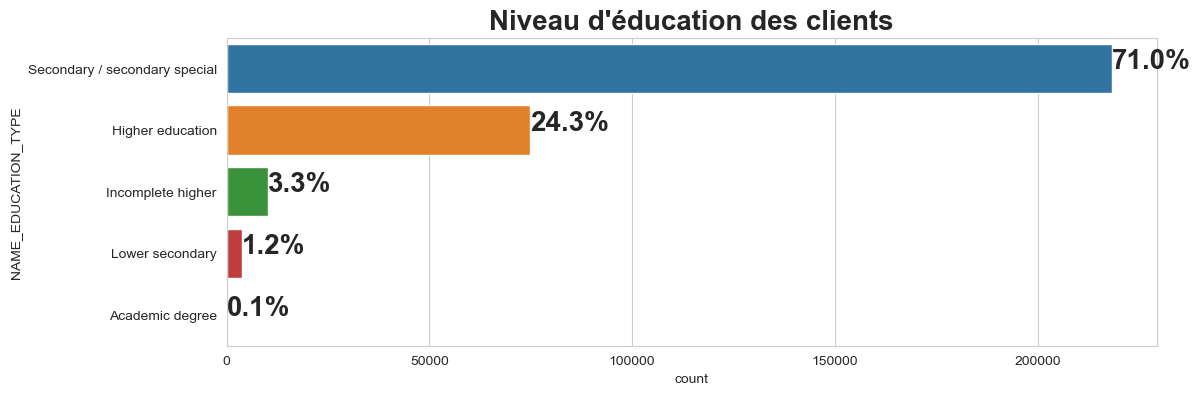

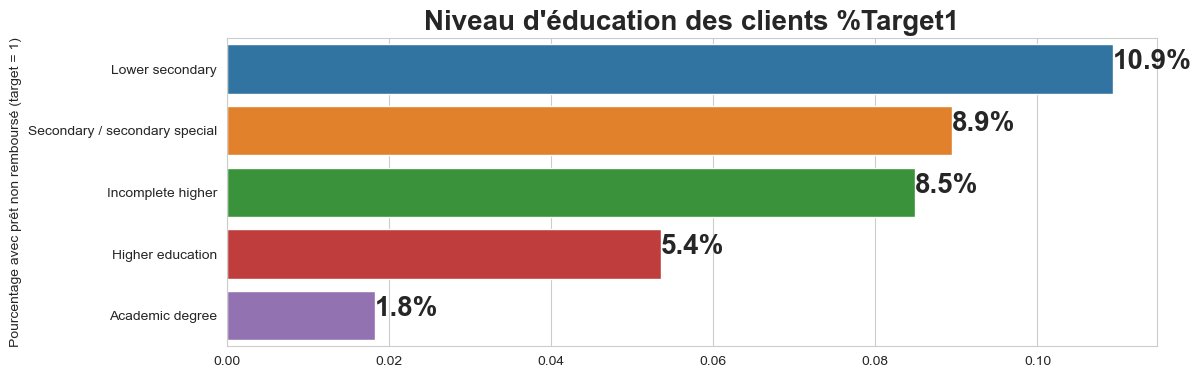

In [34]:
# Niveau d'éducation des clients
plot_stat(application_train, 'NAME_EDUCATION_TYPE',"Niveau d'éducation des clients", (15,10))
plot_percent_target1(application_train, 'NAME_EDUCATION_TYPE',"Niveau d'éducation des clients %Target1", (15,10))

La plupart des clients ont une éducation secondaire, suivent des clients ayant une éducation supérieure. Très peu ont un diplôme universitaire.

Le taux de non-remboursement des prêts le plus élevé (11%) bien que rare, relève des clients de niveau du premier cycle du secondaire. Le taux de non-remboursement des diplômés universitaires est inférieur à 2%.  

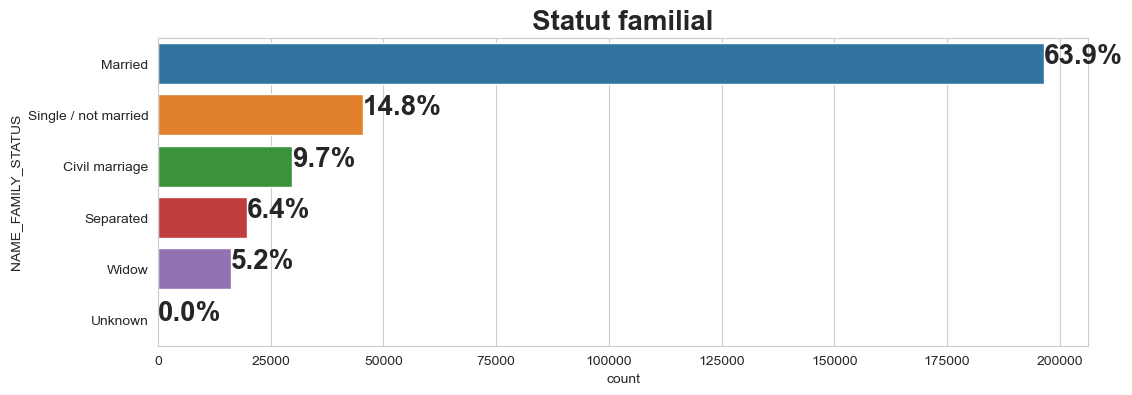

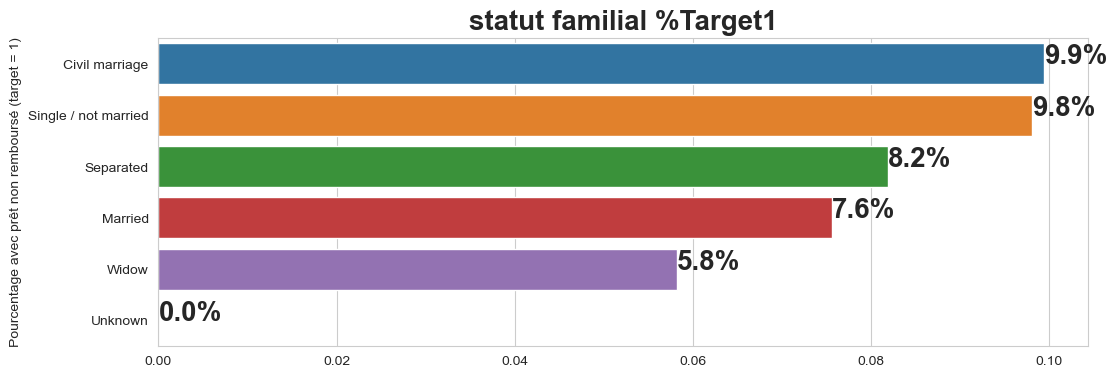

In [35]:
# Statut familial
plot_stat(application_train, 'NAME_FAMILY_STATUS',"Statut familial", (15,10))
plot_percent_target1(application_train, 'NAME_FAMILY_STATUS',"statut familial %Target1", (15,10))

La plupart des clients sont respectivement: Mariés, des célibataires / non mariés et des mariages civils.

Le pourcentage de non-remboursement de prêt le plus élevé (10%), est detenu par le mariage civil, et le plus faible est detenu par la veuve à l'exception de l'inconnu.

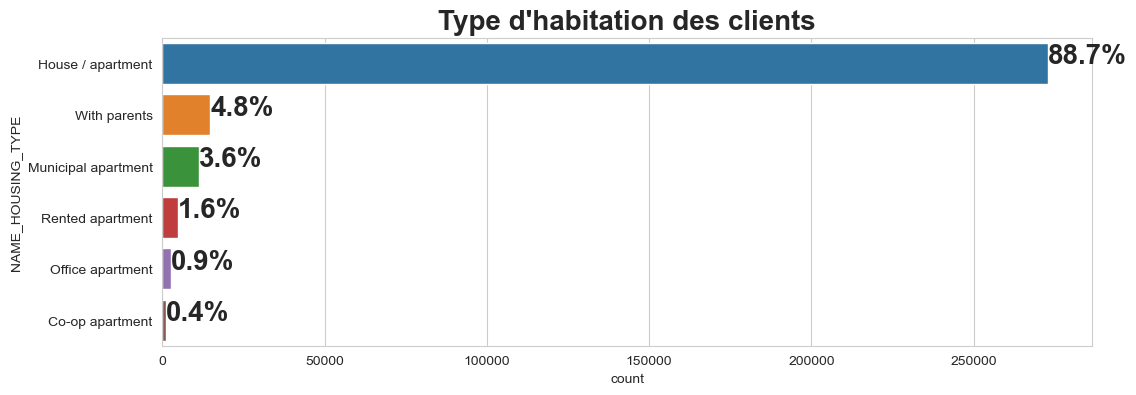

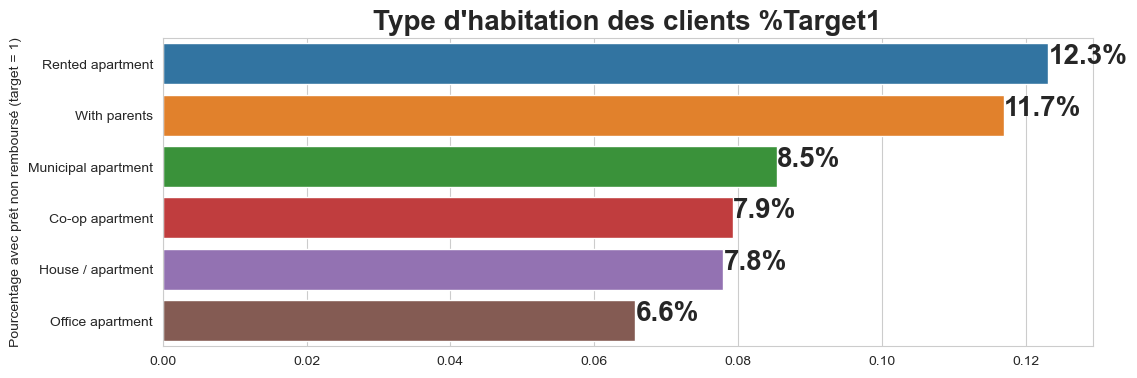

In [36]:
#Type d'habitation
plot_stat(application_train, 'NAME_HOUSING_TYPE',"Type d'habitation des clients", (15,10))
plot_percent_target1(application_train, 'NAME_HOUSING_TYPE',"Type d'habitation des clients %Target1", (15,10))

La plupart des clients 88% vivent dans des maisons ou appartements. Les clients ayant moins d'indépendance (<5%), vivent chez leurs parents, louent des appartements (non propriétaires de leur résidence principale) etc….

Le taux de non-remboursement des prêts le plus élevé (>10%) est détenu par ces clients à faible indépendance.

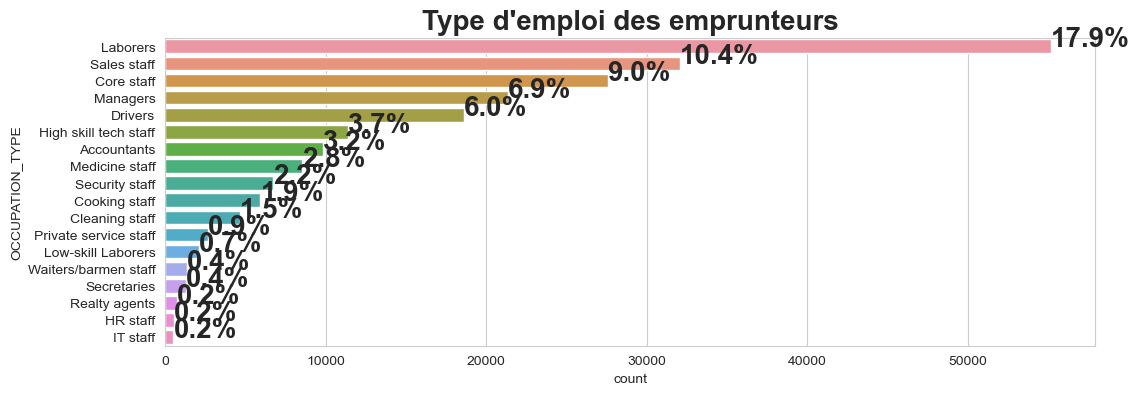

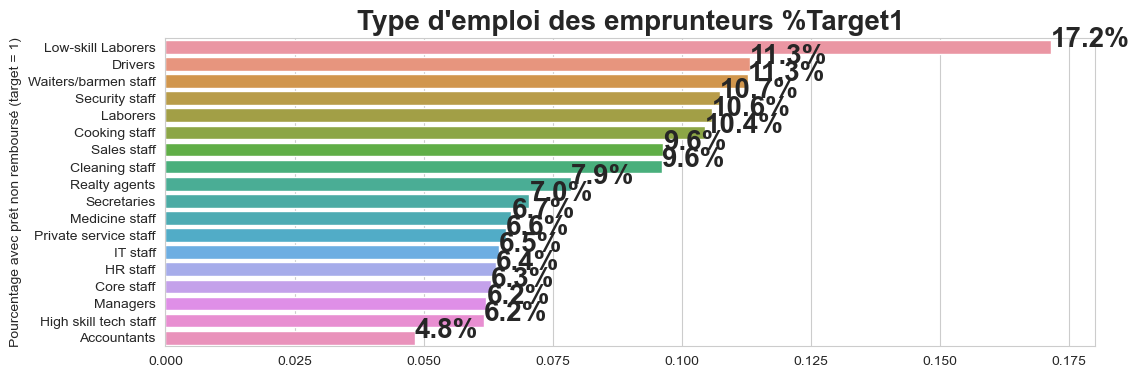

In [37]:
# # Type d'emploi des emprunteurs
plot_stat(application_train, 'OCCUPATION_TYPE',"Type d'emploi des emprunteurs", (15,10))
plot_percent_target1(application_train, 'OCCUPATION_TYPE',"Type d'emploi des emprunteurs %Target1", (15,10))

La plupart des prêts sont contractés par des clients de catégorie: ouvriers, suivis par les vendeurs/commerciaux.

Le taux de non remboursement des prêts le plus élevé est détenu par des ouvriers peu qualifiés (>17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

### III-6-3 Analyse & Visualisation des Variables Numériques.

In [38]:
# Sélection des variables numériques
numeric_vars      = application_train.select_dtypes(include=['int', 'float']).columns.tolist()
application_train_numeric = application_train[numeric_vars]
application_train_numeric

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [39]:
# Valeurs uniques des variables numériques entières.

application_train.select_dtypes('int64').nunique()

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

In [40]:
# NaN sur les variables numériques entières.
application_train.select_dtypes('int64').isna().sum()

SK_ID_CURR                     0
TARGET                         0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUM

Il n'y a pas de données manquantes pour ce type de données.

In [41]:
# Valeurs uniques des variables numériques décimales.

application_train.select_dtypes('float').nunique()

AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_REGISTRATION                15688
OWN_CAR_AGE                         62
CNT_FAM_MEMBERS                     17
EXT_SOURCE_1                    114584
EXT_SOURCE_2                    119831
EXT_SOURCE_3                       814
APARTMENTS_AVG                    2339
BASEMENTAREA_AVG                  3780
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BUILD_AVG                    149
COMMONAREA_AVG                    3181
ELEVATORS_AVG                      257
ENTRANCES_AVG                      285
FLOORSMAX_AVG                      403
FLOORSMIN_AVG                      305
LANDAREA_AVG                      3527
LIVINGAPARTMENTS_AVG              1868
LIVINGAREA_AVG                    5199
NONLIVINGAPARTMENTS_AVG            386
NONLIVINGAREA_AVG                 3290
APARTMENTS_MODE          

In [42]:
# NaN sur des variables numériques décimales.

application_train.select_dtypes('float').isna().sum()

AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
REGION_POPULATION_RELATIVE           0
DAYS_REGISTRATION                    0
OWN_CAR_AGE                     202929
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE          

#### III-6-3-1 Gestion des Valeurs Anormales, atypiques et des Outliers.

Ce sont des erreurs dues à la mauvaise saisie, à l'équipement de mesure ou à des mesures valides mais extrêmes.

In [43]:
application_train.iloc[:, 1:].describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


##### III-6-3-1-1 Analyse de la Variable 'OWN_CAR_AGE'.

In [44]:
application_train.OWN_CAR_AGE.value_counts().sort_index(ascending = False).head(20)

91.0       2
69.0       1
65.0     891
64.0    2443
63.0       2
57.0       1
56.0       1
55.0       4
54.0      12
52.0       1
51.0       3
50.0       1
49.0       6
48.0       1
47.0       1
46.0       5
45.0      11
44.0      21
43.0      19
42.0      42
Name: OWN_CAR_AGE, dtype: int64

* 2 véhicules ont 91 ans;
* 891 véhicules ont 65 ans;
* Plusieurs véhicules (2443) ont 64 ans, ou même sont plus vieux. 
Ces voitures âgées peuvent être des véhicules de collections ou très bien entretenus. 

Text(0.5, 1.0, 'Représentation de la Variable OWN_CAR_AGE')

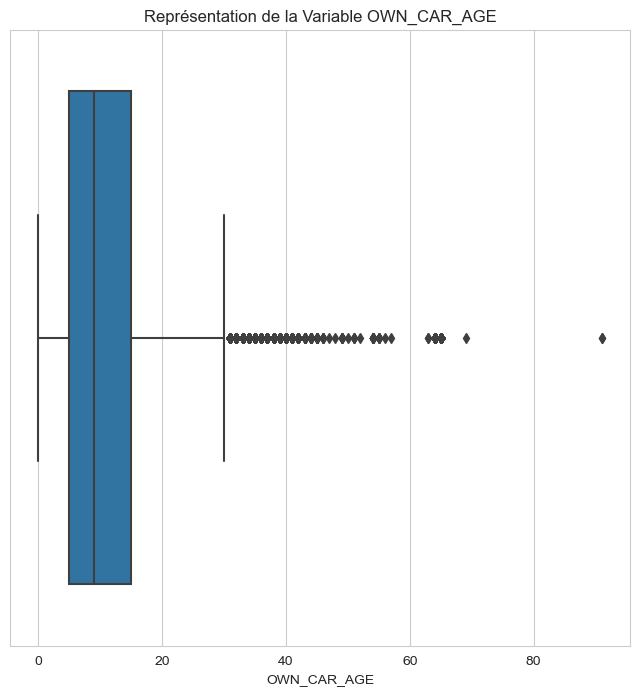

In [45]:
# Boxplot de la Variable 'OWN_CAR_AGE'.

plt.figure(figsize = (8,8))
sns.boxplot(data = application_train_numeric, x = 'OWN_CAR_AGE')
plt.title('Représentation de la Variable OWN_CAR_AGE')

> 91 ans est conservé comme valeurs exceptionnelle ou voire atypique mais non impossible. 

##### III-6-3-1-2 Analyse des Variables 'DAYS'.

In [46]:
# Sélectionner les colonnes contenant le terme "DAYS"
day_vars = [col for col in application_train_numeric.columns if 'DAYS' in col]
df_days = application_train_numeric[day_vars]
df_days

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


Toutes ces variables Days sont négatives. Mais les deux premières attirent l'attention de notre analyse.

###### III-6-3-1-2-1 Analyse de la Variable 'DAYS_BIRTH'.

Les chiffres de cette DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la demande de prêt en cours. Pour plus de compréhension, il est nécessaire de modifier ces dates.

In [47]:
# vérification de l'age des clients calculé en nombre de jours.
application_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Nous avons donc des valeurs aberrantes négatives (min, max) de la variable 'DAYS_BIRTH'. Pour corriger cette anomalie, multiplier ces statistiques par -1 et les diviser par le nombre de jours dans une année.



In [48]:
# Correction des valeurs aberrantes négatives.
(application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

après correction, nous constatons qu'en moyenne, les clients ont 43 ans, le plus jeune a 20 ans et le plus âgé 69 ans. 50% des clients ont moins de 43 ans. Nous pouvons donc dire que l'étude est principalement axée sur les personnes d'une quarantaine d'années.

In [49]:
# Ajoutons une nouvelle variables 'AGE' dans les deux Datasets Train t Test.
# Arrondissons le résultat à l'entier le plus proche pour obtenir l'âge en années.
application_train['AGE'] = round(application_train['DAYS_BIRTH'] / -365).astype('int')
application_test['AGE'] = round(application_test['DAYS_BIRTH'] / -365).astype('int')

Text(0.5, 1.0, 'Age des clients')

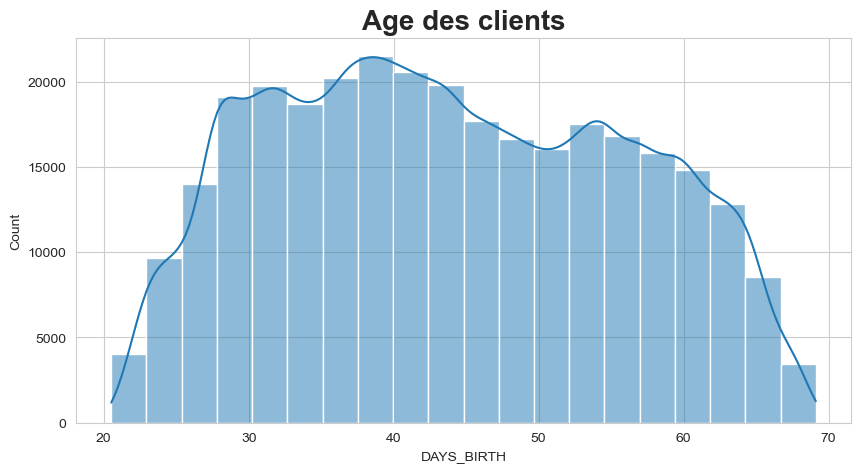

In [50]:
# distribution d'âge des clients
plt.figure(figsize=(10, 5))
sns.histplot((application_train['DAYS_BIRTH'] / -365), bins = 20, kde="True").set_title('Age des clients', fontsize=20, fontweight='bold')
#show()

Il n'y a plus de valeurs aberrantes puisque tous les âges sont raisonnables désormais.

###### III-6-3-1-2-2 Analyse de la Variable 'DAYS_EMPLOYED'.

* Nombre de jours avant la demande de prêt où la personne a commencé l'emploi actuel.

In [51]:
# Signification de la variable 'DAYS_EMPLOYED'
description['Description'][21]

'How many days before the application the person started current employment'

In [52]:
# Vérification de la variable dans l'échantillon d'entrainement
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [53]:
print("Nombre maximal de jours où le client occupe son poste actuel précédents la demande :",application_train['DAYS_EMPLOYED'].max())

Nombre maximal de jours où le client occupe son poste actuel précédents la demande : 365243


Cela correspondrait à **1000 ans**, il est évident que cette variable est un outlier.

Text(0.5, 0, "Les jours d'emploi")

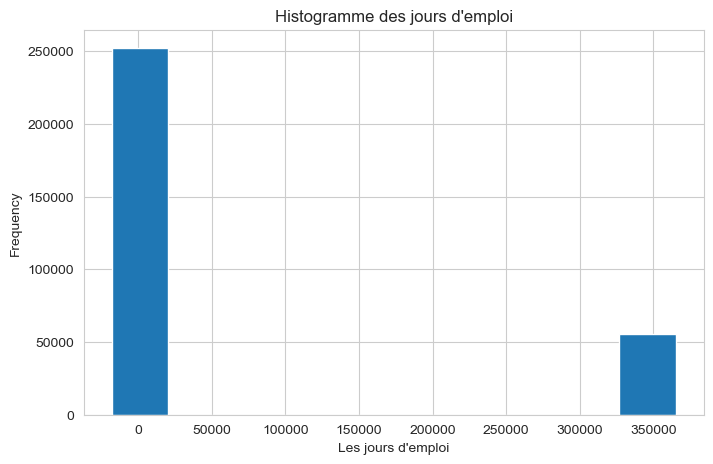

In [54]:
# représentation graphique de la variable 'DAYS_EMPLOYED'.

application_train['DAYS_EMPLOYED'].plot.hist(title = "Histogramme des jours d'emploi", figsize=(8,5));
plt.xlabel("Les jours d'emploi")
#show()

In [55]:
# Identification des valeurs anormales et non anormales de la variable DAYS_EMPLOYED.
anom = application_train[application_train['DAYS_EMPLOYED'] >= 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] < 365243]
print('La valeur par défaut des non-anomalies sur le %0.2f%% de prêts' % (100 * non_anom['TARGET'].mean()))
print('La valeur par défaut des anomalies sur le %0.2f%% de prêts' % (100 * anom['TARGET'].mean()))
print('Il y a %d outliers dans la variable days of employment' % len(anom))

La valeur par défaut des non-anomalies sur le 8.66% de prêts
La valeur par défaut des anomalies sur le 5.40% de prêts
Il y a 55374 outliers dans la variable days of employment


Lorsqu'il n'y a pas d'anomalies, il y a en moyenne 8,66% de défaut. Les anomalies ont 5,40% de défaut et donc un taux inférieur. Nous remplirons les valeurs anormales sans nombre (np.nan) et changerons le nombre de jours en nombre moyen de jours travaillés.



Text(0.5, 0, 'Days Employment')

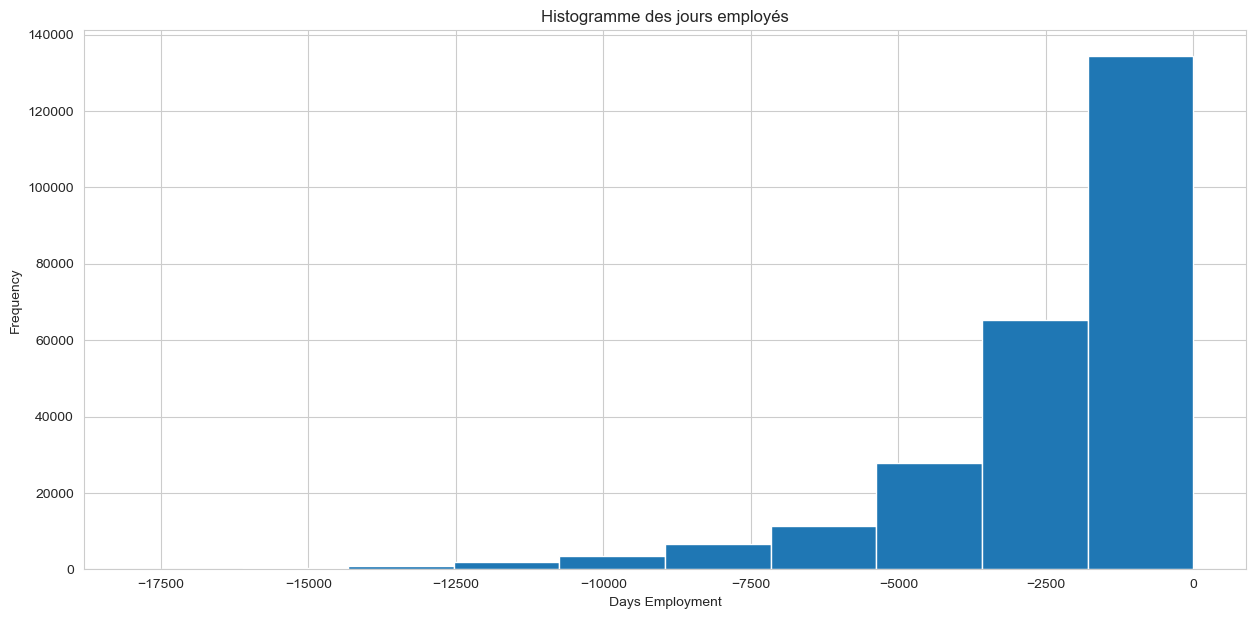

In [56]:
# Création d'une variable avec le label d'anomalie dans le dataset Train.
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243

# Remplacer les outliers par des nan.
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

application_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours employés', figsize=(15,7));
plt.xlabel('Days Employment')

In [57]:
# Création d'une variable avec le label d'anomalie dans le dataset Test.
application_test['DAYS_EMPLOYED_ANOM'] = application_test["DAYS_EMPLOYED"] == 365243
application_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print("Il y a % d'erreurs sur le nombre de jours en emploi du client dans le dataset de test parmis %d de valeurs" % (application_test["DAYS_EMPLOYED_ANOM"].sum(), len(application_test)))

Il y a  9274'erreurs sur le nombre de jours en emploi du client dans le dataset de test parmis 48744 de valeurs


#### III-6-3-2 Corélations avec la Target.

In [58]:
# Trouvons les corrélations avec la target et trions les. 
correlations = application_train_numeric.corr()['TARGET'].sort_values()

# Afficher les 15 corrélations les plus positives (en ordre décroissant).
print('Corrélations les plus positives:\n', correlations.tail(15))

# Afficher les 15 corrélations les plus négatives (en ordre croissant).
print('\nCorrélations les plus négatives:\n', correlations.head(15))

Corrélations les plus positives:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Corrélations les plus négatives:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              

TARGET a la plus forte corrélation positive avec 'DAYS_BIRTH'.

In [59]:
# Transformer les jours de naissance en valeurs positives en utilisant la fonction 'abs()'.
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])

# Calcul de la corrélation entre l'âge (jours de naissance transformés en valeurs positives) et la variable cible 'TARGET'.
print("Corrélation entre l'âge du client au moment du prêt et la TARGET :", application_train['DAYS_BIRTH'].corr(application_train['TARGET']))

Corrélation entre l'âge du client au moment du prêt et la TARGET : -0.07823930830984513


La relation linéaire négative âge clients/Target signifie que, plus les clients vieillissent, plus ils ont tendance à rembourser leurs prêts dans les délais.

##### III-6-3-2-1 Effet de l'âge sur la TARGET.

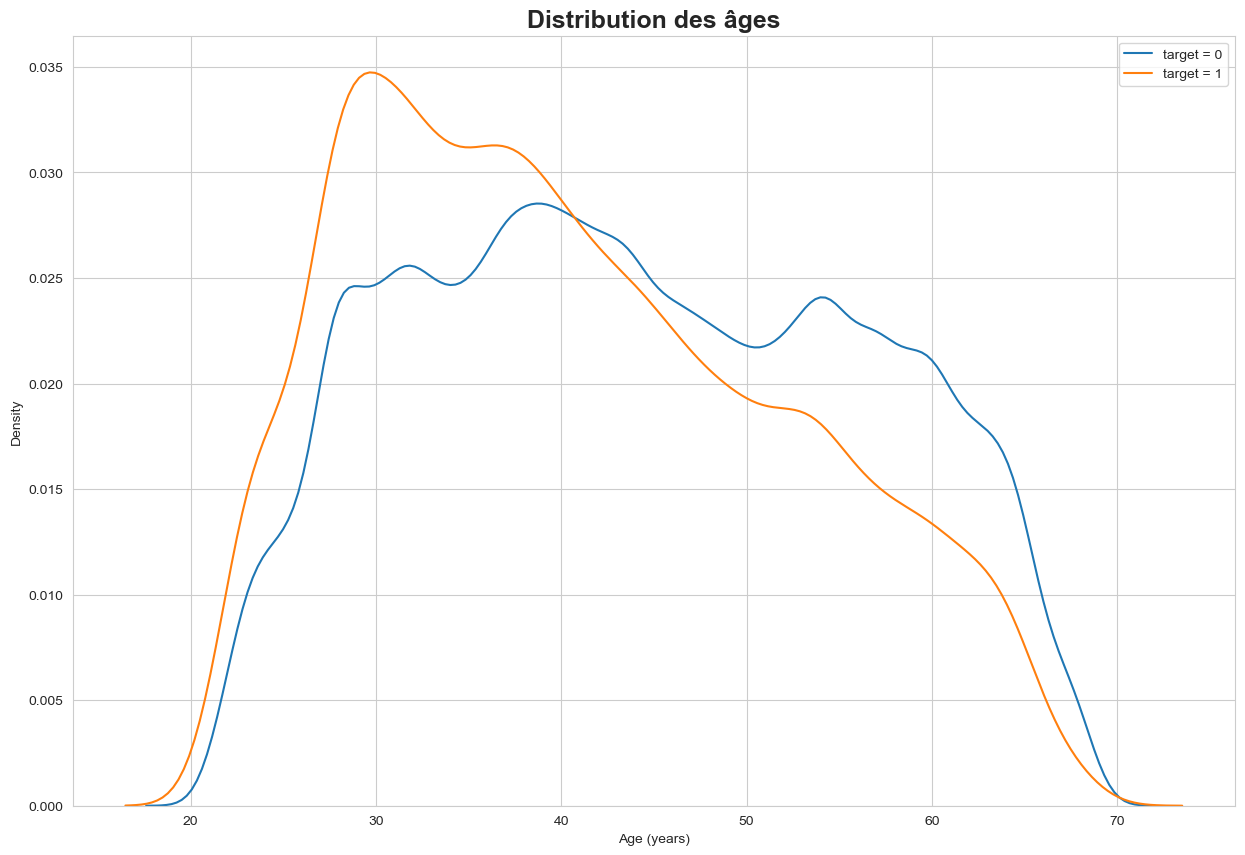

In [60]:
# Représentation Graphique. 
plt.figure(figsize=(15, 10))

# Tracer la distribution de densité (KDE) pour les clients avec target=0 (Non défaut)
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target = 0')

# Tracer la distribution de densité (KDE) pour les clients avec target=1 (Défaut)
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target = 1')

# Étiquettes pour les axes x et y du graphique
plt.xlabel('Age (years)')
plt.ylabel('Density')

# Titre du graphique
plt.title('Distribution des âges', weight='bold', size=18)

# Légende pour distinguer les deux distributions
plt.legend()

# Afficher le graphique
plt.show()

La courbe lorsque la TARGET == 1 penche vers l'extrémité la plus jeune de la fourchette, ceci implique que les clients jeunes ont plus de mal à rembourser.  Cette variable nous sera utile dans la modèlisation car elle affecte la cible.

##### III-6-3-2-2 ratio de prêts non remboursés dans chaque tranche d'âge (par 5 ans).

In [61]:
# Sélection les varianles 'TARGET' et 'DAYS_BIRTH'du Dataset Train.
age_data = application_train[['TARGET', 'DAYS_BIRTH']]

# Convertir les jours de naissance en années en divisant par 365.
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Découper les valeurs de 'YEARS_BIRTH' en 10 tranches d'âge égales allant de 20 à 70 ans.
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))

# Regrouper les données par la variable 'YEARS_BINNED' et calculer la moyenne pour chaque groupe.
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


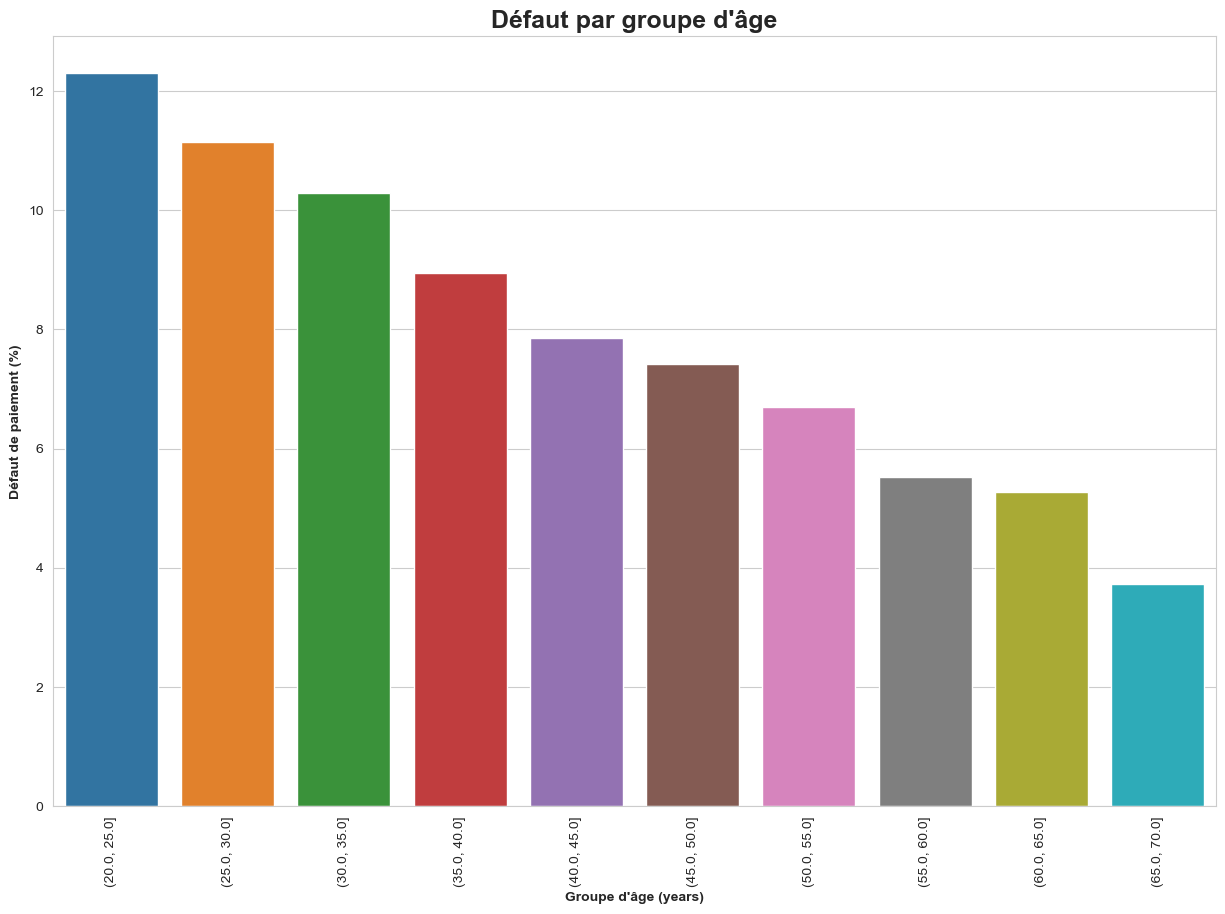

In [62]:
# Illustration par représentation graphique. 
plt.figure(figsize=(15, 10))

# Utiliser la fonction barplot de Seaborn pour afficher le graphique à barres
# Les valeurs sur l'axe des x sont les index du DataFrame age_groups convertis en chaînes de caractères (représentant les tranches d'âge)
# Les valeurs sur l'axe des y représentent la proportion de défauts de paiement dans chaque groupe d'âge
sns.barplot(x=age_groups.index.astype(str), y=100 * age_groups['TARGET'])

# Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Libellés des axes x et y avec des titres en gras
plt.xlabel("Groupe d'âge (years)", weight='bold')
plt.ylabel("Défaut de paiement (%)", weight='bold')

# Titre du graphique en gras avec une taille de police de 18
plt.title("Défaut par groupe d'âge", weight='bold', size=18)

# Affichage du graphique
plt.show()

Les clients les plus jeunes sont plus susceptibles à ne pas rembourser le prêt.

#### III-6-3-3 Analyse des  SOURCES EXTérieures (EXT_SOURCE)

In [63]:
# Sélection des variables d'intérêt dans le Dataset Train.
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# Calcul de la matrice de corrélation entre les variables sélectionnées.
ext_data_corrs = ext_data.corr()

# Affichage de la matrice de corrélation.
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

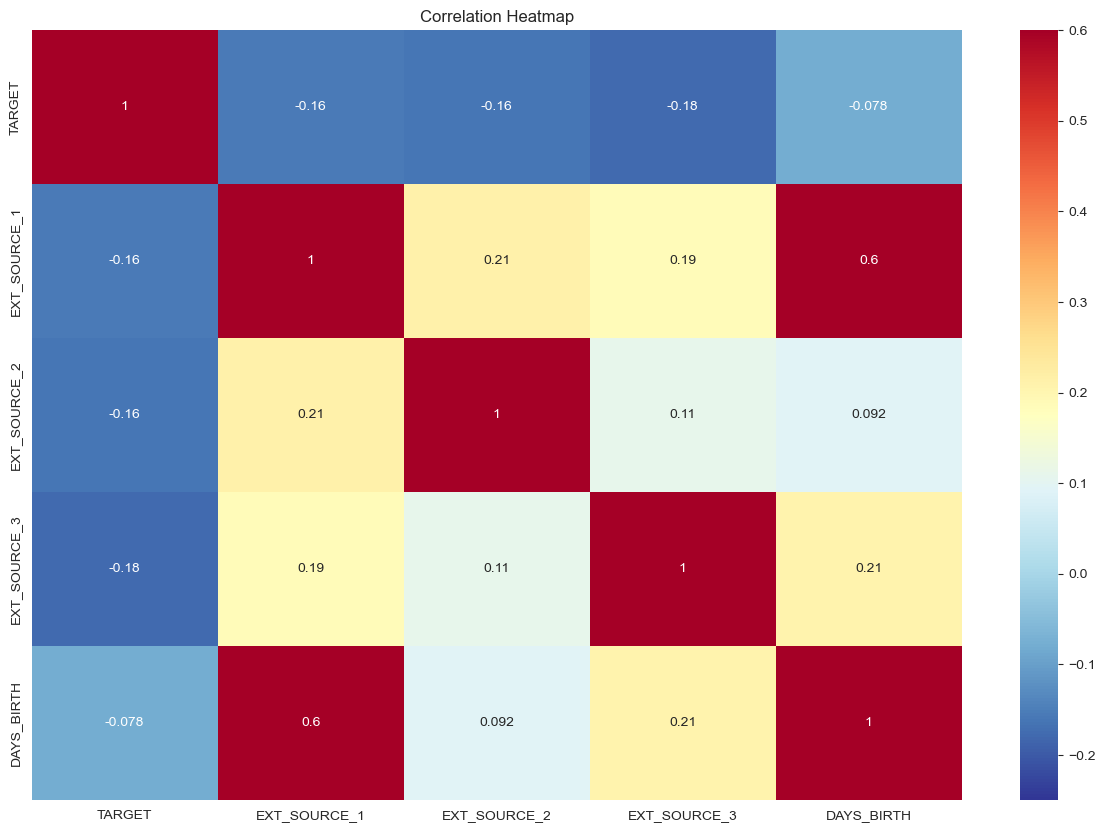

In [64]:
#  Représentation Graphique du Heatmap de la corrélation des variables numériques.
plt.figure(figsize=(15, 10))

# Tracé de la carte thermique des corrélations avec la palette de couleurs 'RdYlBu_r'.
# 'vmin' et 'vmax' sont utilisés pour définir les valeurs minimales et maximales de la palette de couleurs.
# 'annot=True' affiche les valeurs de corrélation sur la carte thermique.
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)

# Ajout d'un titre à la carte thermique.
plt.title('Correlation Heatmap')

Les trois sources extérieure (EXT_SOURCE) ont des corrélations négatives avec la cible. Ceci indique que plus la valeur de l'EXT_SOURCE augmente, plus le client est susceptible de rembourser le prêt. Il apparaît également que DAYS_BIRTH est positivement corrélé avec les EXT_SOURCE, ce qui indique que l'un des facteurs de ces scores est peut-être l'âge du client.

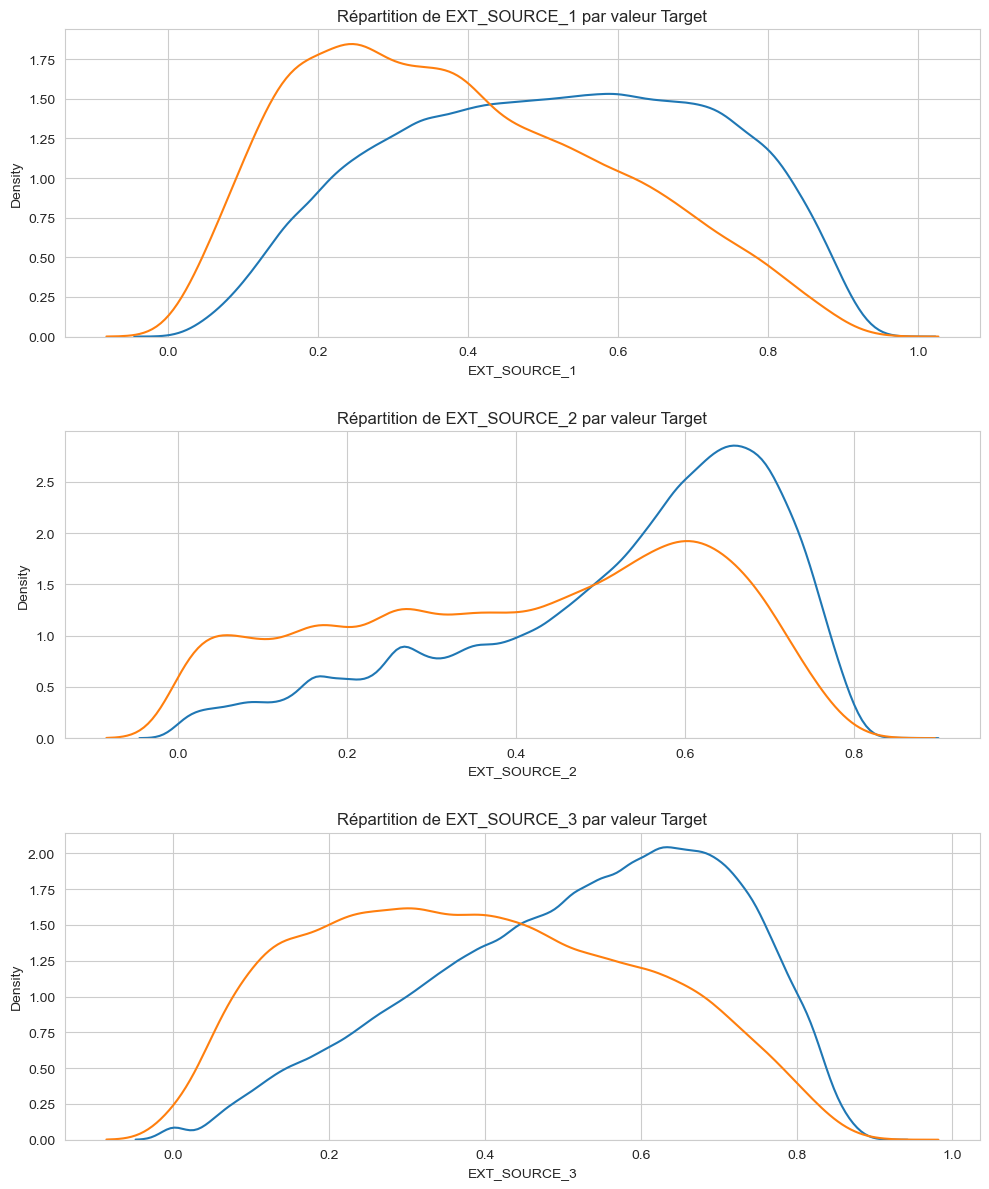

In [65]:
# Représentation graphique entre chaque source exterieure et la Target. 
plt.figure(figsize=(10, 12))

# Boucle pour créer les trois sous-graphiques pour chaque source d'information (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3)
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # Création du sous-graphique i+1 dans une disposition de 3 lignes et 1 colonne.
    plt.subplot(3, 1, i + 1)

    # Tracé de la distribution KDE pour les valeurs de la variable source lorsque 'TARGET' est égal à 0.
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label='target == 0')

    # Tracé de la distribution KDE pour les valeurs de la variable source lorsque 'TARGET' est égal à 1.
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label='target == 1')
    
    # Ajout d'un titre au sous-graphique indiquant la variable étudiée.
    plt.title('Répartition de %s par valeur Target' % source)
    
    # Ajout d'une étiquette pour l'axe des abscisses indiquant le nom de la variable source.
    plt.xlabel('%s' % source)
    
    # Ajout d'une étiquette pour l'axe des ordonnées indiquant 'Density' (densité).
    plt.ylabel('Density')

# Ajustement des espacements verticaux entre les sous-graphiques pour une meilleure lisibilité.
plt.tight_layout(h_pad=2.5)

La relation zntre les 3 EXT_SOURCE ET la Target n'est pas très forte, mais ces variables seront toujours utiles pour un modèle d'apprentissage automatique, car elles permettent de prédire si un demandeur remboursera ou non un prêt à temps.

In [66]:
def plot_distribution(dataframe, feature, title, size):
    # Création d'une figure de taille 'size'.
    plt.figure(figsize=size)

    # Extraction des données pour les deux groupes de cibles : 'TARGET = 0' et 'TARGET = 1'.
    t0 = dataframe.loc[dataframe['TARGET'] == 0]
    t1 = dataframe.loc[dataframe['TARGET'] == 1]

    # Tracé de la distribution KDE pour 'TARGET = 0' en utilisant la variable 'feature'.
    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    
    # Tracé de la distribution KDE pour 'TARGET = 1' en utilisant la variable 'feature'.
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    
    # Ajout d'un titre pour le graphique.
    plt.title(title)
    
    # Suppression de l'étiquette pour l'axe des ordonnées (y-axis) pour éviter la surcharge d'informations.
    plt.ylabel('')
    
    # Ajout d'une légende pour distinguer les deux groupes de cibles dans le graphique.
    plt.legend()
    
    # Affichage du graphique.
    plt.show()

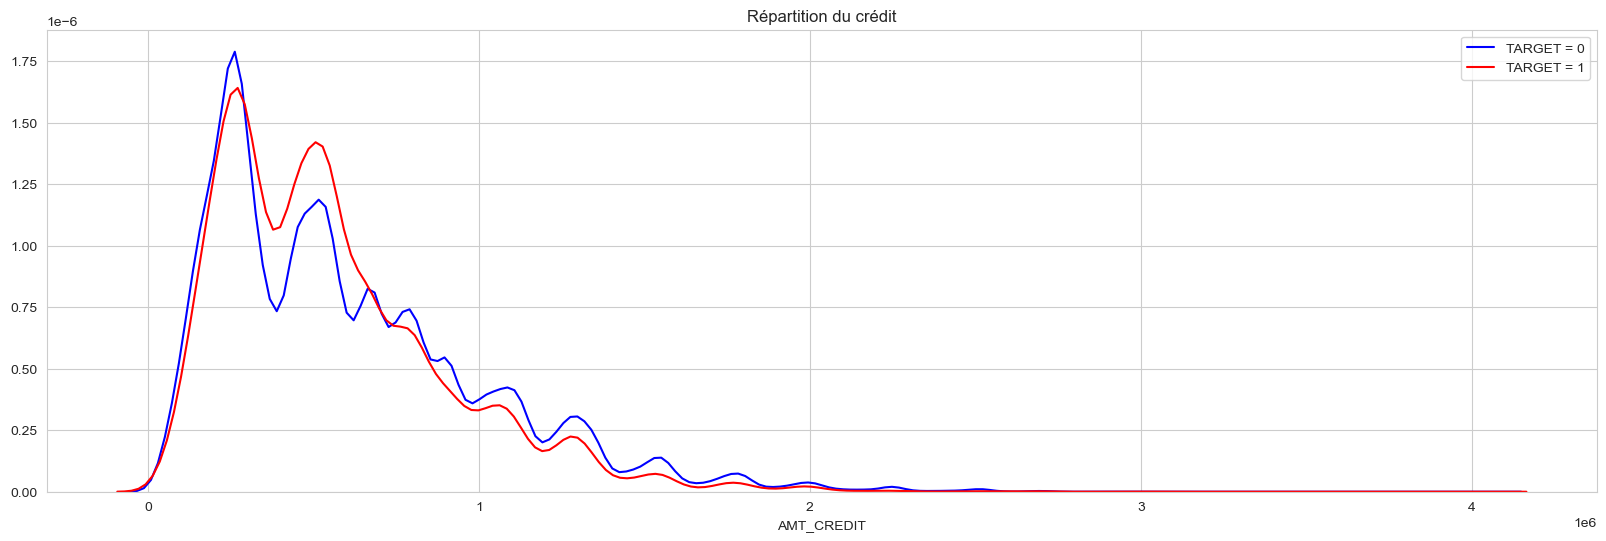

                                   -------------------------------------------------------


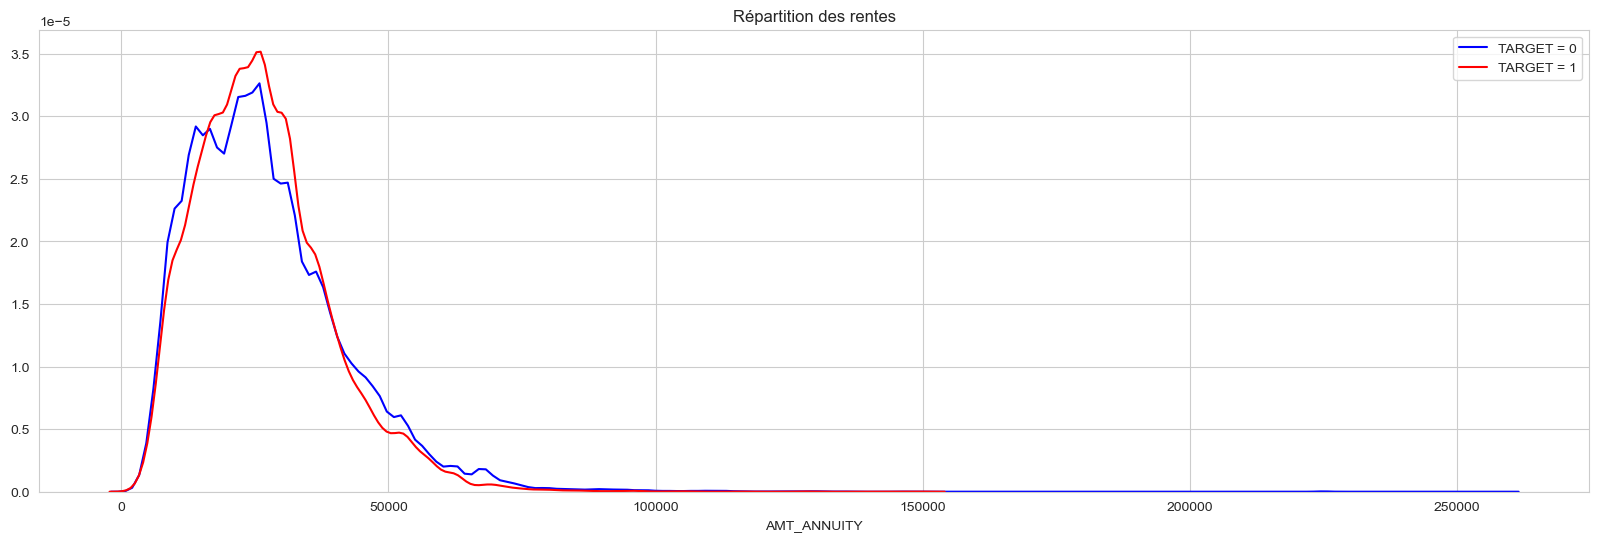

                                   -------------------------------------------------------


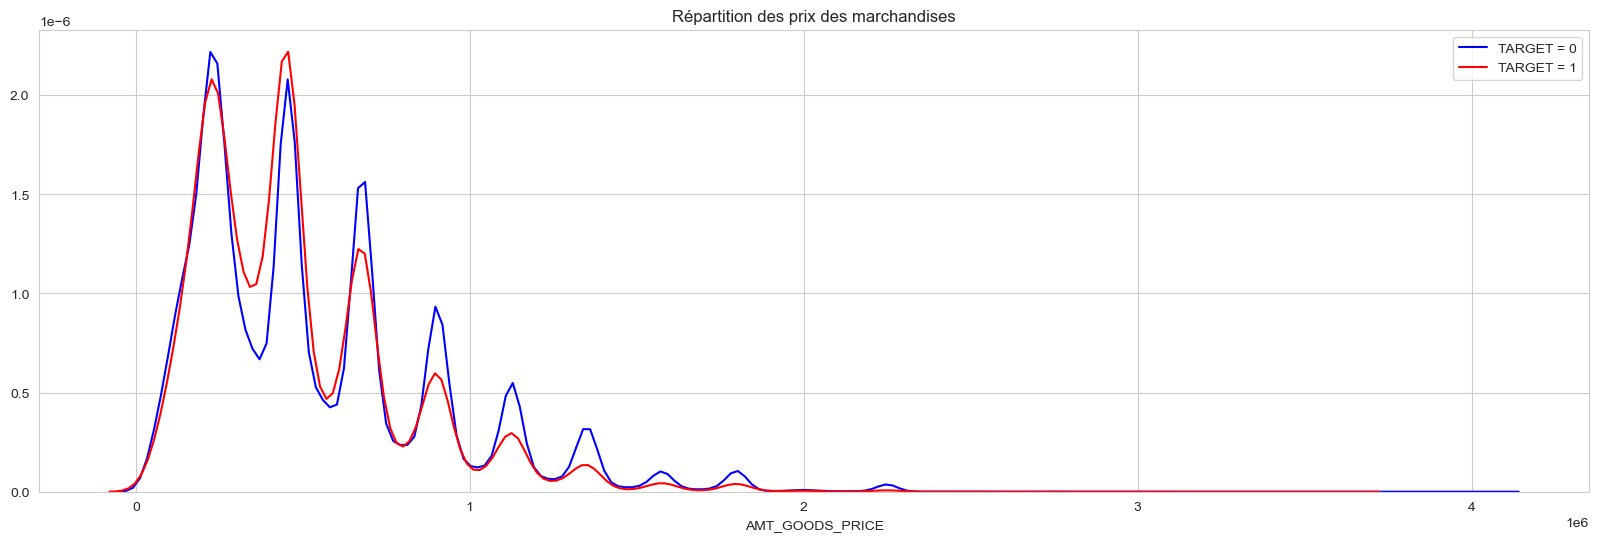

                                   -------------------------------------------------------


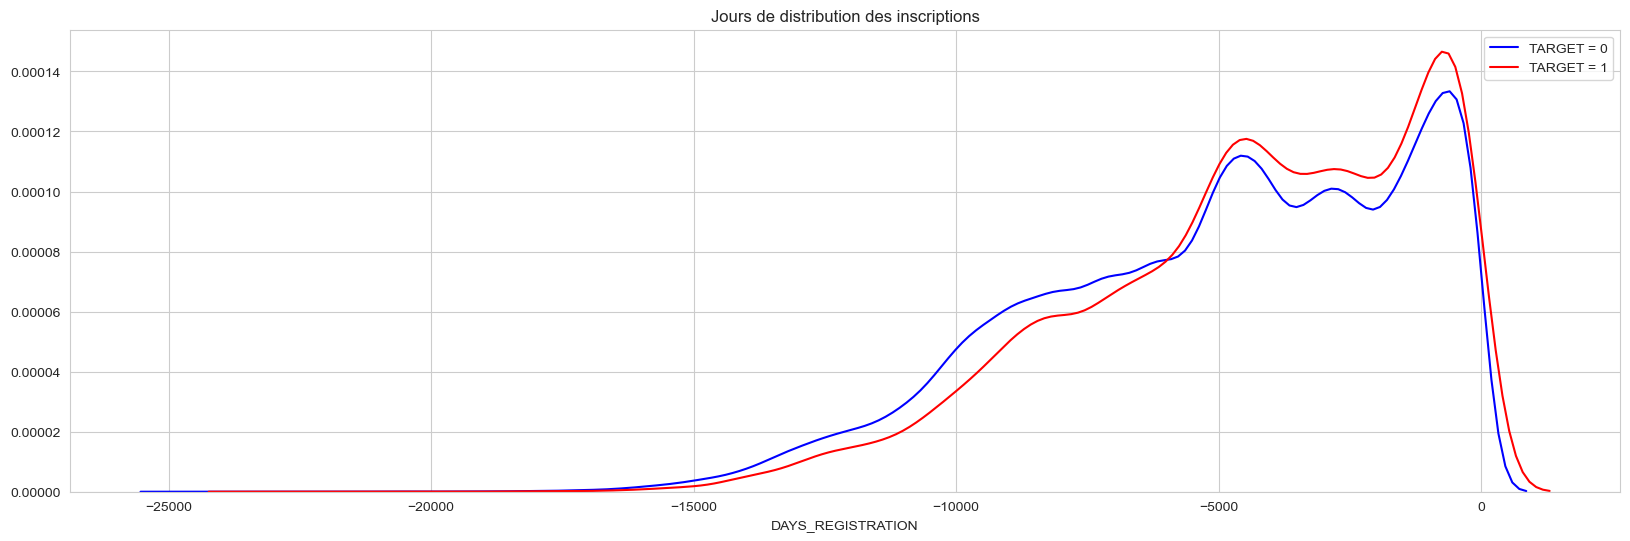

In [67]:
# Tracé de la distribution de la variable 'AMT_CREDIT'.
plot_distribution(application_train, 'AMT_CREDIT', "Répartition du crédit", (20, 6))
print("                                   -------------------------------------------------------")

# Tracé de la distribution de la variable 'AMT_ANNUITY'.
plot_distribution(application_train, 'AMT_ANNUITY', "Répartition des rentes", (20, 6))
print("                                   -------------------------------------------------------")

# Tracé de la distribution de la variable 'AMT_GOODS_PRICE'.
plot_distribution(application_train, 'AMT_GOODS_PRICE', "Répartition des prix des marchandises", (20, 6))
print("                                   -------------------------------------------------------")

# Tracé de la distribution de la variable 'DAYS_REGISTRATION'.
plot_distribution(application_train, 'DAYS_REGISTRATION', "Jours de distribution des inscriptions", (20, 6))

# IV- Préparation des données et feature engineering:MERGING (KERNEL KAGGLE

Les fonctions sont dans le fichier p7_function.py  
Le préprocessing est largement inspiré du préprocessing du kernel de kaggle, mis à disposition pour une modélisation optimum. La fonction **main** est un merge des différents dataframes du projet sur lesquels il a été appliqué plusieurs étapes de préprocessing.

In [68]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [69]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [70]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + 
           " columns. There are " + str(mis_val_table_ren_columns.shape[0]) +
           " columns that have missing values")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [71]:
# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('DATA/application_train.csv', nrows= num_rows)
    print("application_train :",df.shape)
    test_df = pd.read_csv('DATA/application_test.csv', nrows= num_rows)
    print("application_test:",test_df.shape)
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df=df[df['DAYS_EMPLOYED']!= 365243]
    #df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

In [72]:
# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('DATA/bureau.csv', nrows = num_rows)
    print("bureau :",bureau.shape)
    bb = pd.read_csv('DATA/bureau_balance.csv', nrows = num_rows)
    print("bureau_balance:",bb.shape)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    
    
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

In [73]:
# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('DATA/previous_application.csv', nrows = num_rows)
    print("previous_application:",prev.shape)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    #prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_FIRST_DRAWING']!= 365243]
    #prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_FIRST_DUE']!= 365243]
    #prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_LAST_DUE_1ST_VERSION']!= 365243]
    #prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_LAST_DUE']!= 365243]
    #prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    prev=prev[prev['DAYS_TERMINATION']!= 365243]
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

In [74]:
# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('DATA/POS_CASH_balance.csv', nrows = num_rows)
    print("POS_CASH_balance:",pos.shape)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

In [75]:
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('DATA/installments_payments.csv', nrows = num_rows)
    print("installments_payments : ",ins.shape)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

In [76]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('DATA/credit_card_balance.csv', nrows = num_rows)
    print("credit_card_balance:",cc.shape)
    print("")
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

In [77]:
num_rows = 10000 if False else None
df = application_train_test(num_rows)
bureau = bureau_and_balance(num_rows)
df = df.join(bureau, how='left', on='SK_ID_CURR')
del bureau
        
prev = previous_applications(num_rows)
df = df.join(prev, how='left', on='SK_ID_CURR')
del prev
    
pos = pos_cash(num_rows)
df = df.join(pos, how='left', on='SK_ID_CURR')
del pos

ins = installments_payments(num_rows)
df = df.join(ins, how='left', on='SK_ID_CURR')
del ins
   
cc = credit_card_balance(num_rows)
df = df.join(cc, how='left', on='SK_ID_CURR')
del cc

application_train : (307511, 122)
application_test: (48744, 121)
bureau : (1716428, 17)
bureau_balance: (27299925, 3)
previous_application: (1670214, 37)
POS_CASH_balance: (10001358, 8)
installments_payments :  (13605401, 8)
credit_card_balance: (3840312, 23)



In [78]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [79]:
df = df.loc[:, df.isnull().mean() <.50]

In [80]:
missing_values_table(df)

Your selected dataframe has 522 columns. There are 339 columns that have missing values


,Missing Values,% of Total Values
ENTRANCES_MEDI,145381,49.9
ENTRANCES_AVG,145381,49.9
ENTRANCES_MODE,145381,49.9
EXT_SOURCE_1,145296,49.8
LIVINGAREA_AVG,144938,49.7
LIVINGAREA_MEDI,144938,49.7
LIVINGAREA_MODE,144938,49.7
FLOORSMAX_MEDI,143684,49.3
FLOORSMAX_MODE,143684,49.3
FLOORSMAX_AVG,143684,49.3


In [81]:
df.dtypes

index                               int64
SK_ID_CURR                          int64
TARGET                            float64
CODE_GENDER                         int64
FLAG_OWN_CAR                        int64
                                   ...   
INSTAL_AMT_PAYMENT_SUM            float64
INSTAL_DAYS_ENTRY_PAYMENT_MAX     float64
INSTAL_DAYS_ENTRY_PAYMENT_MEAN    float64
INSTAL_DAYS_ENTRY_PAYMENT_SUM     float64
INSTAL_COUNT                      float64
Length: 522, dtype: object

In [82]:
df.head()

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,...,PREV_CODE_REJECT_REASON_HC_MEAN,PREV_CODE_REJECT_REASON_LIMIT_MEAN,PREV_CODE_REJECT_REASON_SCO_MEAN,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_CODE_REJECT_REASON_SYSTEM_MEAN,PREV_CODE_REJECT_REASON_VERIF_MEAN,PREV_CODE_REJECT_REASON_XAP_MEAN,PREV_CODE_REJECT_REASON_XNA_MEAN,PREV_CODE_REJECT_REASON_nan_MEAN,PREV_NAME_TYPE_SUIT

In [83]:
df.isna().sum()

index                                 0
SK_ID_CURR                            0
TARGET                            39470
CODE_GENDER                           0
FLAG_OWN_CAR                          0
                                  ...  
INSTAL_AMT_PAYMENT_SUM            13981
INSTAL_DAYS_ENTRY_PAYMENT_MAX     13987
INSTAL_DAYS_ENTRY_PAYMENT_MEAN    13987
INSTAL_DAYS_ENTRY_PAYMENT_SUM     13981
INSTAL_COUNT                      13981
Length: 522, dtype: int64

In [84]:
df.shape

(291603, 522)

In [85]:
#supprimer les lignes où ya des nan dans la variable TARGET
df = df[df.TARGET.notnull()]

In [86]:
df.isna().sum()

index                                 0
SK_ID_CURR                            0
TARGET                                0
CODE_GENDER                           0
FLAG_OWN_CAR                          0
                                  ...  
INSTAL_AMT_PAYMENT_SUM            13301
INSTAL_DAYS_ENTRY_PAYMENT_MAX     13306
INSTAL_DAYS_ENTRY_PAYMENT_MEAN    13306
INSTAL_DAYS_ENTRY_PAYMENT_SUM     13301
INSTAL_COUNT                      13301
Length: 522, dtype: int64

In [87]:
df.shape

(252133, 522)

In [88]:
df.dtypes

index                               int64
SK_ID_CURR                          int64
TARGET                            float64
CODE_GENDER                         int64
FLAG_OWN_CAR                        int64
                                   ...   
INSTAL_AMT_PAYMENT_SUM            float64
INSTAL_DAYS_ENTRY_PAYMENT_MAX     float64
INSTAL_DAYS_ENTRY_PAYMENT_MEAN    float64
INSTAL_DAYS_ENTRY_PAYMENT_SUM     float64
INSTAL_COUNT                      float64
Length: 522, dtype: object

In [89]:
df['TARGET'] = df['TARGET'].astype('int64')

In [90]:
Counter(df['TARGET'])

Counter({1: 21835, 0: 230298})

In [91]:
df.dtypes

index                               int64
SK_ID_CURR                          int64
TARGET                              int64
CODE_GENDER                         int64
FLAG_OWN_CAR                        int64
                                   ...   
INSTAL_AMT_PAYMENT_SUM            float64
INSTAL_DAYS_ENTRY_PAYMENT_MAX     float64
INSTAL_DAYS_ENTRY_PAYMENT_MEAN    float64
INSTAL_DAYS_ENTRY_PAYMENT_SUM     float64
INSTAL_COUNT                      float64
Length: 522, dtype: object

In [92]:
df.head()

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,...,PREV_CODE_REJECT_REASON_HC_MEAN,PREV_CODE_REJECT_REASON_LIMIT_MEAN,PREV_CODE_REJECT_REASON_SCO_MEAN,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_CODE_REJECT_REASON_SYSTEM_MEAN,PREV_CODE_REJECT_REASON_VERIF_MEAN,PREV_CODE_REJECT_REASON_XAP_MEAN,PREV_CODE_REJECT_REASON_XNA_MEAN,PREV_CODE_REJECT_REASON_nan_MEAN,PREV_NAME_TYPE_SUIT

In [93]:
df.to_csv('dfs.csv', index=True)